In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
#解决中文显示问题
plt.rcParams["font.sans-serif"] = [u"SimHei"]
plt.rcParams["axes.unicode_minus"] = False
#解决图中负号问题
plt.rcParams['axes.unicode_minus']=False

In [2]:
column_name=['id','target','card_type','netlong','owner_city','arpu','out_prdct_fee','prdct_fee','point_fee','myth_fee','brand','listing_date','listing_price','nettime','user_level','sex','family_client','group_client','music','expirationtime','video_member','other_tv','finance','bank','campus_client','migu_tv','age','adis','arpu_avg','myth_fee_avg','out_prdct_fee_avg','prdct_fee_avg','os','battery_capacity','storage','screen_size']

# names = ['id','target','card_type','netlong','owner_city','arpu','out_prdct_fee','prdct_fee','point_fee','myth_fee','brand','listing_date','listing_price','nettime','user_level','sex','family_client','group_client','music','expirationtime','video_member','other_tv','finance','bank','campus_client','migu_tv','age','adis','arpu_avg','myth_fee_avg','out_prdct_fee_avg','prdct_fee_avg']
xy_1 = pd.read_table('ZZ0702GuangFa_Samples100000_FeatureData.txt',names=column_name)
xy_1.head()

,id,target,card_type,netlong,owner_city,arpu,out_prdct_fee,prdct_fee,point_fee,myth_fee,...,age,adis,arpu_avg,myth_fee_avg,out_prdct_fee_avg,prdct_fee_avg,os,battery_capacity,storage,screen_size
0,13013302938,1,0.0,NaN,联通联通,9.0,0.0,0.0,0.0,0.0,...,NaN,NaN,38.863332,0.0,NaN,0.0,4.0,4120mAh,64GB,6.0
1,13022062073,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13035901978,1,NaN,NaN,NaN,37.2,0.0,0.0,0.0,0.0,...,NaN,NaN,37.013334,0.0,NaN,0.0,NaN,NaN,NaN,NaN
3,13042151031,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3050mAh,16/64GB,5.0
4,13045173577,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
xy_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103513 entries, 0 to 103512
Data columns (total 36 columns):
id                   103513 non-null int64
target               103513 non-null int64
card_type            102937 non-null float64
netlong              38493 non-null float64
owner_city           102937 non-null object
arpu                 102821 non-null float64
out_prdct_fee        102821 non-null float64
prdct_fee            102821 non-null float64
point_fee            102821 non-null float64
myth_fee             102821 non-null float64
brand                74599 non-null object
listing_date         73871 non-null float64
listing_price        70781 non-null float64
nettime              38493 non-null object
user_level           58576 non-null float64
sex                  41165 non-null float64
family_client        25125 non-null float64
group_client         19995 non-null float64
music                16352 non-null float64
expirationtime       4165 non-null object
video_mem

In [4]:
plt.style.use('bmh')
plt.rc('font',family = 'SimHei',size = 13)
#cat_list = ['id','target','card_type','netlong','owner_city','arpu','out_prdct_fee','prdct_fee','point_fee','myth_fee','brand','listing_date','listing_price','nettime','user_level','sex','family_client','group_client','music','expirationtime','video_member','other_tv','finance','bank','campus_client','migu_tv','age','adis','arpu_avg','myth_fee_avg','out_prdct_fee_avg','prdct_fee_avg']
cat_list=column_name
for n,i in enumerate(cat_list):
    xy_1_cat_num = xy_1[i].value_counts().index.shape[0]
    print('{0}.{1}特征的类型数量是：{2}'.format(n+1,i,xy_1_cat_num))

1.id特征的类型数量是：100000
2.target特征的类型数量是：2
3.card_type特征的类型数量是：6
4.netlong特征的类型数量是：59
5.owner_city特征的类型数量是：265
6.arpu特征的类型数量是：19328
7.out_prdct_fee特征的类型数量是：4820
8.prdct_fee特征的类型数量是：3439
9.point_fee特征的类型数量是：7908
10.myth_fee特征的类型数量是：153
11.brand特征的类型数量是：679
12.listing_date特征的类型数量是：1105
13.listing_price特征的类型数量是：581
14.nettime特征的类型数量是：37348
15.user_level特征的类型数量是：8
16.sex特征的类型数量是：2
17.family_client特征的类型数量是：1
18.group_client特征的类型数量是：1
19.music特征的类型数量是：1
20.expirationtime特征的类型数量是：4161
21.video_member特征的类型数量是：1
22.other_tv特征的类型数量是：1
23.finance特征的类型数量是：1
24.bank特征的类型数量是：1
25.campus_client特征的类型数量是：1
26.migu_tv特征的类型数量是：1
27.age特征的类型数量是：46
28.adis特征的类型数量是：1
29.arpu_avg特征的类型数量是：53525
30.myth_fee_avg特征的类型数量是：408
31.out_prdct_fee_avg特征的类型数量是：17066
32.prdct_fee_avg特征的类型数量是：8294
33.os特征的类型数量是：10
34.battery_capacity特征的类型数量是：430
35.storage特征的类型数量是：135
36.screen_size特征的类型数量是：69


In [5]:
# 去除重复行：
xy_1.drop_duplicates(keep='first',inplace=True)
xy_1.reset_index(inplace=True)

(103513, 37)

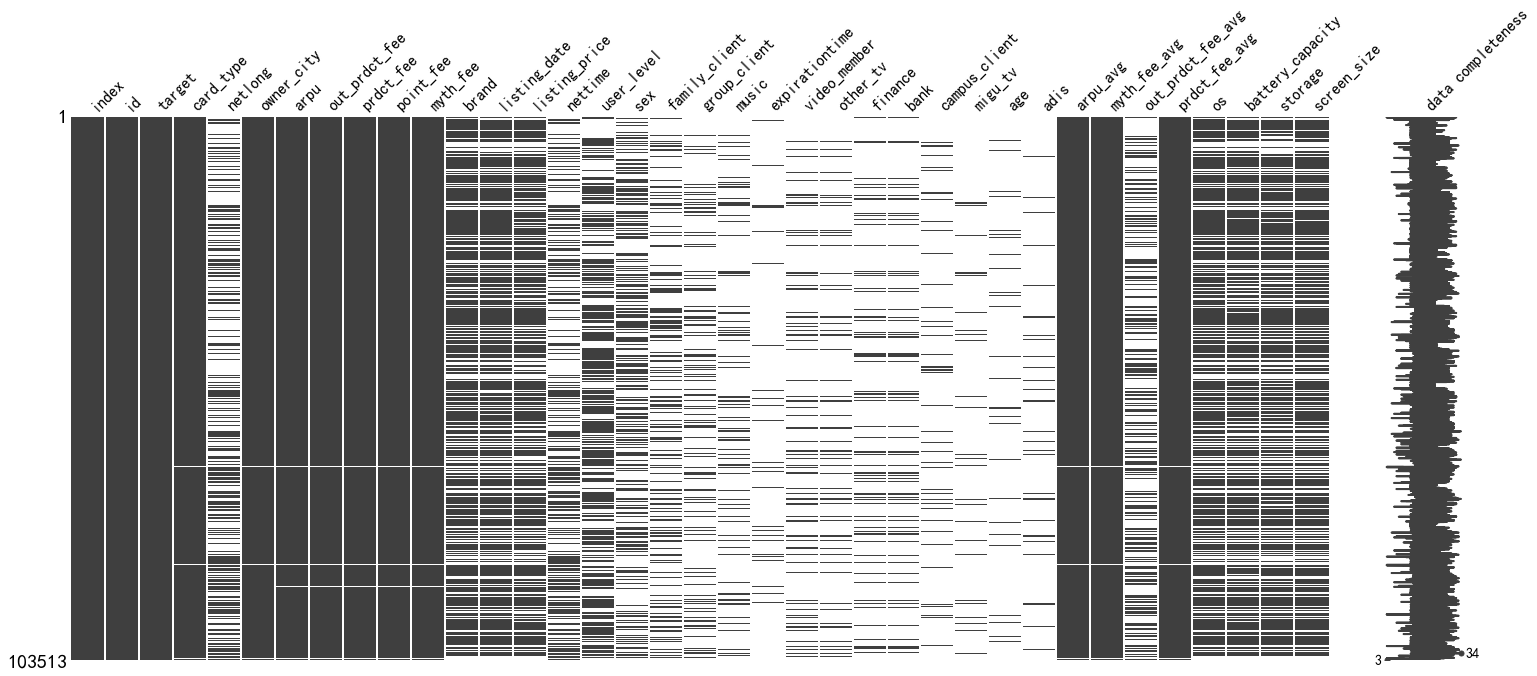

In [6]:
msno.matrix(xy_1,labels = True)
xy_1.shape

In [7]:
pandas_profiling.ProfileReport(xy_1)

Number of variables,37
Number of observations,103513
Total Missing (%),40.6%
Total size in memory,29.2 MiB
Average record size in memory,296.0 B
Numeric,16
Categorical,6
Boolean,11
Date,0
Text (Unique),0
Rejected,4


In [8]:
#根据手机上市时间衍生出，上市到现在的累计月份变量listing_data_months
#核心代码，转换，array转换成str使用[:]，转换成int加减
def month_sept(data):
    lst1=[]
    for n in range(len(data)):
        a=data.loc[n]['listing_date']
        if '2019' in str(a):
            month_num = str(a)[4:6]
            lst1.append(month_num)
        elif '2018' in str(a):
            month_num = 12-int(str(a)[4:6])+4
            lst1.append(month_num)
        elif( '2017' in str(a)) and (str(a)!='2017.0'):
            month_num = 12-int(str(a)[4:6])+4+12
            lst1.append(month_num)
        elif '2016' in str(a)and (str(a)!='2016.0'):
            month_num = 12-int(str(a)[4:6])+4+24
            lst1.append(month_num)
        elif '2015' in str(a)and (str(a)!='2015.0'):
            month_num = 12-int(str(a)[4:6])+4+36
            lst1.append(month_num)
        elif '2014' in str(a)and (str(a)!='2014.0'):
            month_num = 12-int(str(a)[4:6])+4+48
            lst1.append(month_num)
        elif '2013' in str(a) and(str(a)!='2013.0'):
            month_num = 12-int(str(a)[4:6])+4+60
            lst1.append(month_num)
    c= pd.concat([xy_1,pd.DataFrame(lst1)],axis=1)
    c.rename(columns={0:'listing_data_months'},inplace = True)
    return c
xy_2 = month_sept(xy_1)

In [9]:
xy_3 = pd.read_table('city_ranking.txt',names = ['owner_city','owner_city_level'])
xy_5 = pd.merge(xy_2,xy_3,on='owner_city',how = 'left')

In [10]:
xy_5.columns

Index(['index', 'id', 'target', 'card_type', 'netlong', 'owner_city', 'arpu',
       'out_prdct_fee', 'prdct_fee', 'point_fee', 'myth_fee', 'brand',
       'listing_date', 'listing_price', 'nettime', 'user_level', 'sex',
       'family_client', 'group_client', 'music', 'expirationtime',
       'video_member', 'other_tv', 'finance', 'bank', 'campus_client',
       'migu_tv', 'age', 'adis', 'arpu_avg', 'myth_fee_avg',
       'out_prdct_fee_avg', 'prdct_fee_avg', 'os', 'battery_capacity',
       'storage', 'screen_size', 'listing_data_months', 'owner_city_level'],
      dtype='object')

In [11]:
usefulcolumnlist=['target', 'card_type', 'netlong', 'owner_city', 'arpu',
       'out_prdct_fee', 'prdct_fee', 'point_fee', 'brand',
       'listing_price', 'user_level', 'sex',
       'family_client', 'group_client', 'music', 
       'video_member','finance', 'bank',
       'arpu_avg',
       'out_prdct_fee_avg', 'prdct_fee_avg', 'battery_capacity',
       'storage', 'screen_size', 'listing_data_months', 'owner_city_level']

xy_6 = xy_5[usefulcolumnlist]


In [12]:
xy_6[['battery_capacity','storage','screen_size']].head()

,battery_capacity,storage,screen_size
0,4120mAh,64GB,6.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,3050mAh,16/64GB,5.0
4,NaN,NaN,NaN


In [13]:
xy_6['battery_capacity'].value_counts()

def DealBatteryFormat(RowSeriers):
    import re
    if RowSeriers.battery_capacity!=RowSeriers.battery_capacity:
        return 9999
    else:
        Battery = RowSeriers.battery_capacity
        Batterynum = re.findall('\d+',Battery)[0]
        return int(Batterynum)

xy_6['battery_capacity']=xy_6.apply(DealBatteryFormat,axis=1)

In [14]:
xy_6['battery_capacity'].value_counts().head()

9999    32836
3000     9860
4000     4907
2000     4231
1715     2815
Name: battery_capacity, dtype: int64

In [15]:
def DealstorageFormat(RowSeriers):
    storagestr=str(RowSeriers.storage)
   
    if 'G' in storagestr:
        storagesplit=storagestr.split('/')[0]
        if 'G' in storagesplit:
            
            return storagesplit.split('G')[0]+'GB'
        else:            
            return storagesplit+'GB'
    if 'M' in storagestr:
        storagesplit=storagestr.split('/')[0]
        if 'M' in storagesplit:
            return storagesplit.split('M')[0]+'MB'
        else:
            return storagesplit+'MB'
    else:
        return storagestr    

xy_6['storage']=xy_6.apply(DealstorageFormat,axis=1)

In [16]:
xy_6['battery_capacity'].value_counts()/len(xy_6['battery_capacity'])

9999       0.312620
3000       0.093873
4000       0.046718
2000       0.040282
1715       0.026801
1800       0.021212
2900       0.020812
2400       0.019555
2200       0.019374
3100       0.018565
4100       0.014719
3050       0.013767
2750       0.013710
1900       0.013653
3010       0.013062
3075       0.012653
2850       0.012596
2500       0.012577
2300       0.012567
2910       0.011967
1960       0.011491
2600       0.010796
2550       0.010768
1500       0.010720
800        0.008759
2350       0.008016
3200       0.007521
3340       0.007426
2100       0.005722
1700       0.005579
             ...   
6010       0.000010
2130       0.000010
570        0.000010
1460       0.000010
2780       0.000010
280        0.000010
8220       0.000010
9501320    0.000010
1101       0.000010
2430       0.000010
1780       0.000010
3560       0.000010
5382420    0.000010
2515       0.000010
2730       0.000010
300        0.000010
3290       0.000010
1390       0.000010
7306       0.000010


In [17]:
xy_6['finance'].value_counts()
xy_6['finance'] = xy_6['finance'].fillna(9999)
xy_6['finance'].value_counts()

xy_6['bank'].value_counts()
xy_6['bank'] = xy_6['bank'].fillna(9999)
xy_6['bank'].value_counts()

xy_6['owner_city'].value_counts()
xy_6['owner_city'] = xy_6['owner_city'].fillna(9999)
xy_6['owner_city'].value_counts()

xy_6['card_type'].value_counts()
xy_6['card_type'] = xy_6['card_type'].fillna(9999)
xy_6['card_type'].value_counts()

xy_6['netlong'].value_counts()
xy_6['netlong'] = xy_6['netlong'].fillna(9999)
xy_6['netlong'].value_counts()

# arpu 空值填充为999 ，异常值处理
xy_6['arpu'].value_counts()
xy_6['arpu'].describe()
xy_6['arpu'][xy_6['arpu']>500].value_counts()#u+1.5标准差3000
#xy_6['arpu'][xy_6['arpu']>500] = 41.82#中位数替换异常值
xy_6['arpu'] = xy_6['arpu'].fillna(9999)
xy_6['arpu'].value_counts()
# arpu_avg
xy_6['arpu_avg'].value_counts()#空值填充为999 ，异常值处理
xy_6['arpu_avg'].describe()
xy_6['arpu_avg'][xy_6['arpu_avg']>3000].value_counts()#u+1.5标准差3000
#xy_6['arpu_avg'][xy_6['arpu_avg']>3000] = 43.54#中位数替换异常值
xy_6['arpu_avg'] = xy_6['arpu_avg'].fillna(9999)
xy_6['arpu_avg'].value_counts()

# out_prdct_fee 空值填充为999，异常值处理,Nan没超过30%，按时0值超过了50%，直接构造成（空，0，大于0三类）
xy_6['out_prdct_fee'].value_counts()
xy_6['out_prdct_fee'].describe()
xy_6['out_prdct_fee'][xy_6['out_prdct_fee']>0] = 1
xy_6['out_prdct_fee'] = xy_6['out_prdct_fee'].fillna(9999)
xy_6['out_prdct_fee'].value_counts()
# out_prdct_fee_avg Nan超过30%，直接构造成（空，0，大于0三类）
xy_6['out_prdct_fee_avg'].value_counts()
xy_6['out_prdct_fee_avg'].describe()
xy_6['out_prdct_fee_avg'][xy_6['out_prdct_fee_avg']>0] = 1
xy_6['out_prdct_fee_avg'] = xy_6['out_prdct_fee_avg'].fillna(9999)
xy_6['out_prdct_fee_avg'].value_counts()

# prdct_fee 空值填充为999，异常值处理,Nan没超过30%，加上0值未超过50%，加一层空值999
xy_6['prdct_fee'].value_counts()
# xy_6 = xy_6.drop(xy_6['prdct_fee'][xy_6['prdct_fee']==0])#删除0值后看剩下的上四分位点加上1.5倍（999-18）=2500
# xy_6['prdct_fee'].describe()
xy_6['prdct_fee'][xy_6['prdct_fee']>500].value_counts()#中位数替换异常值
#xy_6['prdct_fee'][xy_6['prdct_fee']>500] = 23
xy_6['prdct_fee'] = xy_6['prdct_fee'].fillna(9999)
xy_6['prdct_fee'].value_counts()
# prdct_fee_avg空值填充为999，异常值处理,Nan没超过30%，加上0值（7232）未超过50%，加一层空值999
xy_6['prdct_fee_avg'].value_counts()
# xy_6 = xy_6.drop(xy_6['prdct_fee_avg'][xy_6['prdct_fee_avg']==0])#删除0值后看剩下的上四分位点加上1.5倍（999-18）=2500
xy_6['prdct_fee_avg'].describe()
xy_6['prdct_fee_avg'][xy_6['prdct_fee_avg']>500].value_counts()#中位数替换异常值
#xy_6['prdct_fee_avg'][xy_6['prdct_fee_avg']>500] = 24.6
xy_6['prdct_fee_avg'] = xy_6['prdct_fee_avg'].fillna(9999)
xy_6['prdct_fee_avg'].value_counts()

# point_fee 空值填充为999，异常值处理,Nan没超过30%，加上0值（27824）超过50%，构造（空，0，大于0三类）
xy_6['point_fee'].value_counts()
xy_6['point_fee'][xy_6['point_fee']>0] = 1
xy_6['point_fee'] = xy_6['point_fee'].fillna(9999)
xy_6['point_fee'].value_counts()

# sex 构造3类
xy_6['sex'].value_counts()
xy_6['sex'] = xy_6['sex'].fillna(9999)
xy_6['sex'].value_counts()

# family_client Nan超过30%，构造（空，1两类）
xy_6['family_client'].value_counts()
xy_6['family_client'] = xy_6['family_client'].fillna(9999)
xy_6['family_client'].value_counts()

# group_client  Nan超过30%，构造（空，1两类）
xy_6['group_client'].value_counts()
xy_6['group_client'] = xy_6['group_client'].fillna(9999)
xy_6['group_client'].value_counts()

# music  Nan超过30%，构造（空，1两类）
xy_6['music'].value_counts()
xy_6['music'] = xy_6['music'].fillna(9999)
xy_6['music'].value_counts()

# video_member Nan超过30%，构造（空，1两类）
xy_6['video_member'].value_counts()
xy_6['video_member'][xy_6['video_member'].notnull()] = 1
xy_6['video_member'] = xy_6['video_member'].fillna(9999)
xy_6['video_member'].value_counts()


# listing_data_months 空值填充为999，异常值处理,Nan没超过30%，加上0值未超过50%，加一层空值999
xy_6['listing_data_months'].value_counts()
xy_6['listing_data_months'] = xy_6['listing_data_months'].fillna(9999)
xy_6['listing_data_months'].value_counts()

# user_level  空值填充为999，异常值处理,Nan没超过30%，加上0值未超过50%，加一层空值999
xy_6['user_level'].value_counts()
xy_6['user_level'] = xy_6['user_level'].fillna(9999)
xy_6['user_level'].value_counts()

# listing_price 空值填充为999，异常值处理,Nan没超过30%，加上0值（7232）未超过50%，加一层空值999
xy_6['listing_price'].value_counts()
xy_6['listing_price'] = xy_6['listing_price'].fillna(9999)
xy_6['listing_price'].value_counts()

# brand 空值填充为999，异常值处理,Nan没超过30%，加上0值（7232）未超过50%，加一层空值999
xy_6['brand'].value_counts()
xy_6['brand'] = xy_6['brand'].fillna(9999)
xy_6['brand'].value_counts()

# owner_city_level
xy_6['owner_city_level'].value_counts()
xy_6['owner_city_level'] = xy_6['owner_city_level'].fillna(9999)
xy_6['owner_city_level'].value_counts()
#以上，异常值，空值处理完毕

xy_6['brand'].value_counts()
xy_6['brand'][xy_6['brand']==9999] = '空值'
xy_6['brand'][~xy_6['brand'].isin(['vivo','OPPO','苹果','小米','华为','华为荣耀','三星','金立','酷派','魅族','空值'])] ='其它品牌'
xy_6['brand'].value_counts()

# ['battery_capacity','storage','screen_size']
xy_6['battery_capacity'] = xy_6['battery_capacity'].fillna(9999)
xy_6['battery_capacity'].value_counts()
# xy_6['battery_capacity'][xy_6['battery_capacity']=='nan'] = '空值'
# xy_6['battery_capacity'][~xy_6['battery_capacity'].isin(['3000mah','nan','4000mah','1715mah','3050mah','2000mah','1800mah','2750mah','2910mah','1960mah','2900mah','2400mah','3010mah','3100mah','2200mah','2930mah','2850mah','2600mah','2300mah','4100mah','2550mah','3075mah','2500mah','1900mah','2350mah'])] ='其它电池'

xy_6['storage'] = xy_6['storage'].fillna('空值')
xy_6['storage'][~xy_6['storage'].isin(['nan','16GB','32GB','64GB','8GB','4GB','32MB','128MB','512MB','64MB','128GB','256MB','8MB','4MB','16MB'])] ='其它存储'

xy_6['screen_size'] = xy_6['screen_size'].fillna(99)
#xy_6['screen_size']=xy_6['screen_size'].astype(str)
#xy_6['screen_size'][~xy_6['screen_size'].isin(['5.5','4.7','5','5.2','4','6','5.7','5.8','4.5','5.1','5.9','3.5','空值'])] ='其它屏幕'


# #以上，异常值，空值处理完毕

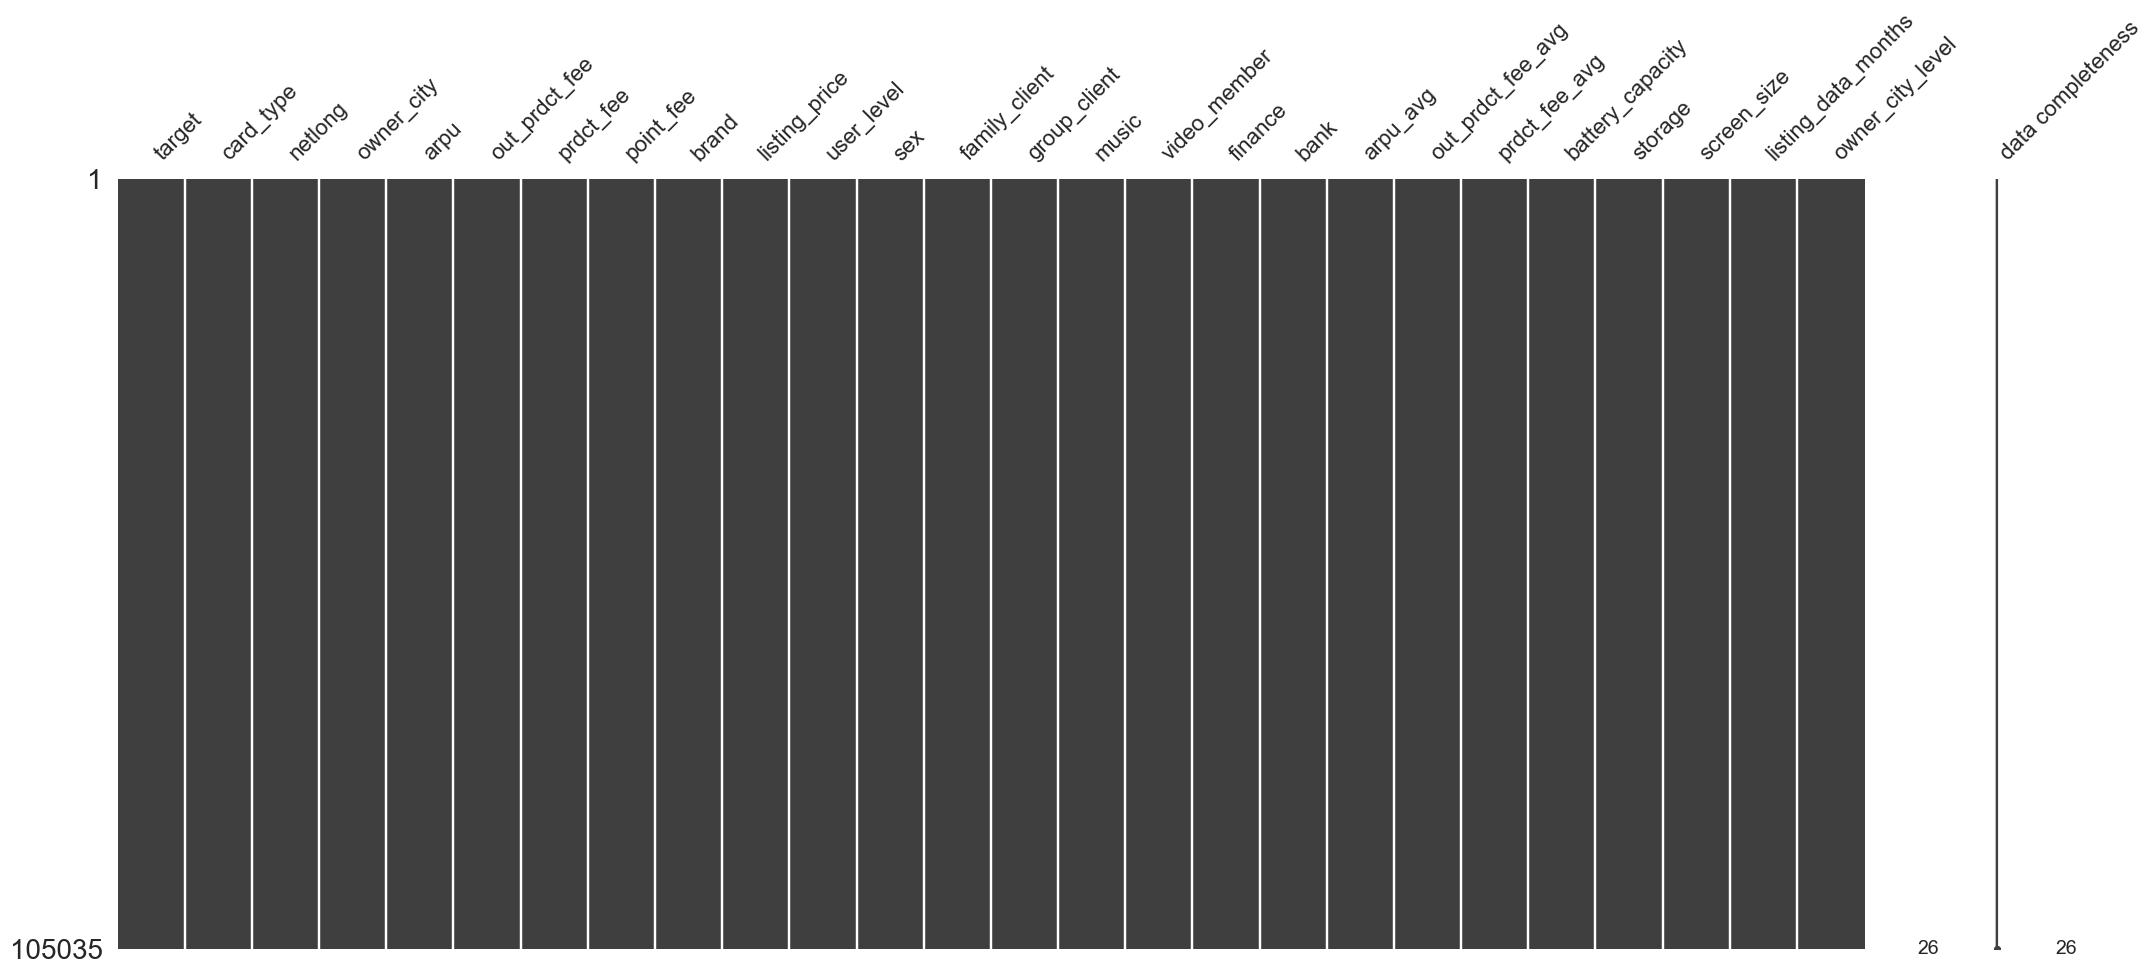

In [18]:
msno.matrix(xy_6,labels = True)

In [19]:
pandas_profiling.ProfileReport(xy_6)

Number of variables,26
Number of observations,105035
Total Missing (%),0.0%
Total size in memory,21.6 MiB
Average record size in memory,216.0 B
Numeric,13
Categorical,3
Boolean,6
Date,0
Text (Unique),0
Rejected,4


In [20]:
xy_6.columns

Index(['target', 'card_type', 'netlong', 'owner_city', 'arpu', 'out_prdct_fee',
       'prdct_fee', 'point_fee', 'brand', 'listing_price', 'user_level', 'sex',
       'family_client', 'group_client', 'music', 'video_member', 'finance',
       'bank', 'arpu_avg', 'out_prdct_fee_avg', 'prdct_fee_avg',
       'battery_capacity', 'storage', 'screen_size', 'listing_data_months',
       'owner_city_level'],
      dtype='object')

In [21]:
usefulcolumn2=['target','arpu','battery_capacity','brand','card_type','family_client','finance','group_client','listing_data_months','listing_price','music','netlong','out_prdct_fee','out_prdct_fee_avg','owner_city','owner_city_level','prdct_fee','screen_size','sex','storage','user_level','video_member']

xy_6=xy_6[usefulcolumn2]

xy_6.drop_duplicates(keep='first',inplace=True)
xy_6.reset_index(inplace=True)

In [22]:
for columns in usefulcolumn2:
    print(columns,len(xy_6[columns].value_counts()))

target 2
arpu 19329
battery_capacity 282
brand 12
card_type 7
family_client 2
finance 2
group_client 2
listing_data_months 61
listing_price 581
music 2
netlong 60
out_prdct_fee 3
out_prdct_fee_avg 3
owner_city 266
owner_city_level 11
prdct_fee 3440
screen_size 70
sex 3
storage 16
user_level 9
video_member 2


In [23]:
#核心代码：遍历版分箱操作
def column_binning(data):
    column_list = ['arpu','battery_capacity','listing_data_months','listing_price','netlong','prdct_fee']
    xy_10 = data
    for column in column_list:
        print(column)
        xy_10.insert(2,column+'_derive_1',xy_10[column])
        xy_7 = xy_10[(xy_10[column+'_derive_1'] == 9999) | (xy_10[column+'_derive_1'] == 0)]
        xy_8 = xy_10[(0<xy_10[column+'_derive_1'])&(xy_10[column+'_derive_1']<9999)]
        xy_8[column+'_derive_1'] = pd.qcut(xy_8[column+'_derive_1'],8)
        xy_9 = pd.concat([xy_8,xy_7],axis = 0)
        xy_10 = xy_9#循环一次的结果作为下一次循环的开始数据，不能直接给data复制，所以需要有xy_10这个中间变量
    return xy_9
xy_9=column_binning(xy_6)

arpu
battery_capacity
listing_data_months
listing_price
netlong
prdct_fee


In [26]:
xy_9.to_excel('20190702广发_信用卡_分箱.xlsx',index = None)

In [24]:
xy_9.columns

Index(['index', 'target', 'prdct_fee_derive_1', 'netlong_derive_1',
       'listing_price_derive_1', 'listing_data_months_derive_1',
       'battery_capacity_derive_1', 'arpu_derive_1', 'arpu',
       'battery_capacity', 'brand', 'card_type', 'family_client', 'finance',
       'group_client', 'listing_data_months', 'listing_price', 'music',
       'netlong', 'out_prdct_fee', 'out_prdct_fee_avg', 'owner_city',
       'owner_city_level', 'prdct_fee', 'screen_size', 'sex', 'storage',
       'user_level', 'video_member'],
      dtype='object')

In [25]:
ChuanQi_basic_df=xy_9
ChuanQi_basic_df=ChuanQi_basic_df[['target', 'prdct_fee_derive_1', 'netlong_derive_1',
       'listing_price_derive_1', 'listing_data_months_derive_1',
       'battery_capacity_derive_1', 'arpu_derive_1', 'arpu',
       'battery_capacity', 'brand', 'card_type', 'family_client', 'finance',
       'group_client', 'listing_data_months', 'listing_price', 'music',
       'netlong', 'out_prdct_fee', 'out_prdct_fee_avg', 'owner_city',
       'owner_city_level', 'prdct_fee', 'screen_size', 'sex', 'storage',
       'user_level', 'video_member']]

ChuanQi_basic_df.reset_index(inplace=True,drop=True)
display(ChuanQi_basic_df.head(),ChuanQi_basic_df.shape)

,target,prdct_fee_derive_1,netlong_derive_1,listing_price_derive_1,listing_data_months_derive_1,battery_capacity_derive_1,arpu_derive_1,arpu,battery_capacity,brand,...,out_prdct_fee,out_prdct_fee_avg,owner_city,owner_city_level,prdct_fee,screen_size,sex,storage,user_level,video_member
0,0,"(10.0, 18.0]","(0.999, 9.0]","(1399.0, 1999.0]","(16.999, 29.0]","(2850.0, 3000.0]","(25.38, 39.82]",30.0,2900,OPPO,...,0.0,9999.0,福建泉州,5.0,18.0,5.2,9999.0,32GB,9999.0,1.0
1,0,"(71.0, 98.0]","(9.0, 14.0]","(3499.0, 5288.0]","(31.0, 36.0]","(3600.0, 8220.0]","(58.1, 81.1]",78.0,3750,华为,...,0.0,9999.0,陕西西安,3.0,78.0,5.5,9999.0,64GB,9999.0,9999.0
2,0,"(18.0, 31.702]","(43.0, 50.0]","(1399.0, 1999.0]","(36.0, 41.0]","(2400.0, 2850.0]","(25.38, 39.82]",28.0,2720,vivo,...,0.0,0.0,河南焦作,7.0,28.0,5.5,9999.0,16GB,0.0,9999.0
3,0,"(71.0, 98.0]","(50.0, 58.0]","(5288.0, 8999.0]","(36.0, 41.0]","(1715.0, 2000.0]","(81.1, 108.2]",101.0,1800,苹果,...,0.0,1.0,河南焦作,7.0,98.0,5.5,9999.0,16GB,3.0,9999.0
4,0,"(0.009000000000000001, 10.0]","(9.0, 14.0]","(1999.0, 2798.0]","(36.0, 41.0]","(3060.0, 3600.0]","(0.009000000000000001, 16.0]",9.2,3230,vivo,...,1.0,1.0,吉林长春,3.0,8.0,5.5,9999.0,64GB,9999.0,9999.0


(103500, 28)

In [26]:
def DealBrandOPP0(RowSeries):
    BrandName=RowSeries.brand
    if BrandName in ['OPPO','OPPO ']:
        return 'OPPO'
    else:
        return BrandName
ChuanQi_basic_df.brand=ChuanQi_basic_df.apply(DealBrandOPP0,axis=1)

brand_group=ChuanQi_basic_df.groupby('target')['brand']

In [27]:
def brand_num(ChuanQi_basic_df):
    title_mapping = {'苹果':1,'华为':2,'小米':3,'华为荣耀':4,'三星':5,'OPPO':6,'vivo':7,'魅族':8,'金立':9,'酷派':10,'空值':11,'其它品牌':12}
    ChuanQi_basic_df['brand'] = ChuanQi_basic_df['brand'].map(title_mapping)
brand_num(ChuanQi_basic_df)
ChuanQi_basic_df.columns

Index(['target', 'prdct_fee_derive_1', 'netlong_derive_1',
       'listing_price_derive_1', 'listing_data_months_derive_1',
       'battery_capacity_derive_1', 'arpu_derive_1', 'arpu',
       'battery_capacity', 'brand', 'card_type', 'family_client', 'finance',
       'group_client', 'listing_data_months', 'listing_price', 'music',
       'netlong', 'out_prdct_fee', 'out_prdct_fee_avg', 'owner_city',
       'owner_city_level', 'prdct_fee', 'screen_size', 'sex', 'storage',
       'user_level', 'video_member'],
      dtype='object')

In [28]:
import numpy as np
#convernetlong_derive_2	listing_price_derive_2
#interval_list=['listing_data_months_derive_1','prdct_fee_avg_derive_1','arpu_avg_derive_1','prdct_fee_derive_1','listing_price_derive_1','arpu_derive_1','netlong_derive_1']
# 传奇游戏特征选择后的连续值：
#interval_list=['arpu_derive_1','listing_price','prdct_fee','arpu_avg','prdct_fee_avg','listing_data_months']

# 网贷游戏特征选择后的连续变量：
interval_list=['prdct_fee_derive_1', 'netlong_derive_1',
       'listing_price_derive_1', 'listing_data_months_derive_1',
       'battery_capacity_derive_1', 'arpu_derive_1',]
# 将区间值列的中间对应值：

intervalcolumn_df={}

def ConverIntervalData():
    for intervalcolumn in interval_list:
        ChuanQi_basic_df[intervalcolumn]=ChuanQi_basic_df[intervalcolumn].astype('str')
        intervalunique=ChuanQi_basic_df[intervalcolumn].unique()
        #print(intervalunique)
        intervalcolumn_df[intervalcolumn]={'intervaluniquelist':[]}
        intervalcolumn_df[intervalcolumn]['intervaluniquelist']=intervalunique
        intervalcolumn_df[intervalcolumn]['intervalValueDict']={}
        for intervalValue in intervalunique:
            intervalLeft=0.0
            intervalRight=0.0
            #print(intervalValue)
            if ', ' in intervalValue:
                intervalValueSplit=intervalValue.split(', ')
                intervalLeft=float(intervalValueSplit[0].split('(')[1])
                intervalRight=float(intervalValueSplit[1].split(']')[0])
                #print(intervalValueSplit,intervalLeft,intervalRight)
                intervalcolumn_df[intervalcolumn]['intervalValueDict'][intervalValue]=(intervalRight+intervalLeft)/2
            else:
                intervalLeft=float(intervalValue)
                intervalRight=float(intervalValue)
                intervalcolumn_df[intervalcolumn]['intervalValueDict'][intervalValue]=(intervalRight+intervalLeft)/2
        
        intervalcolumnAvg=[]
        for intervalValuekey in intervalcolumn_df[intervalcolumn]['intervalValueDict']:
            intervalcolumnAvg.append(intervalcolumn_df[intervalcolumn]['intervalValueDict'][intervalValuekey])
        intervalcolumnAvg=np.array(intervalcolumnAvg)
        intervalcolumnAvgSortIndex=intervalcolumnAvg.argsort()
        maxpointvalue=(intervalcolumnAvg[intervalcolumnAvgSortIndex[-2]]-intervalcolumnAvg[intervalcolumnAvgSortIndex[-3]])/2+intervalcolumnAvg[intervalcolumnAvgSortIndex[-2]]
        intervalcolumn_df[intervalcolumn]['intervalValueDict']['9999']=maxpointvalue
        #print(intervalcolumnAvg,maxpointvalue)      
ConverIntervalData() 

In [29]:
# 将interval 列的数据进行替换操作：

def ReplaceIntervalColumnValue():
    for intervalcolumn in interval_list:
        ChuanQi_basic_df[intervalcolumn].replace(intervalcolumn_df[intervalcolumn]['intervalValueDict'],inplace=True)
        #print(a.head(10),ChuanQi_basic_df[intervalcolumn].head(10))
ReplaceIntervalColumnValue()

In [30]:
display(ChuanQi_basic_df.head(),ChuanQi_basic_df.columns)

,target,prdct_fee_derive_1,netlong_derive_1,listing_price_derive_1,listing_data_months_derive_1,battery_capacity_derive_1,arpu_derive_1,arpu,battery_capacity,brand,...,out_prdct_fee,out_prdct_fee_avg,owner_city,owner_city_level,prdct_fee,screen_size,sex,storage,user_level,video_member
0,0,14.0000,4.9995,1699.0,22.9995,2925.0,32.6000,30.0,2900,6,...,0.0,9999.0,福建泉州,5.0,18.0,5.2,9999.0,32GB,9999.0,1.0
1,0,84.5000,11.5000,4393.5,33.5000,5910.0,69.6000,78.0,3750,2,...,0.0,9999.0,陕西西安,3.0,78.0,5.5,9999.0,64GB,9999.0,9999.0
2,0,24.8510,46.5000,1699.0,38.5000,2625.0,32.6000,28.0,2720,7,...,0.0,0.0,河南焦作,7.0,28.0,5.5,9999.0,16GB,0.0,9999.0
3,0,84.5000,54.0000,7143.5,38.5000,1857.5,94.6500,101.0,1800,1,...,0.0,1.0,河南焦作,7.0,98.0,5.5,9999.0,16GB,3.0,9999.0
4,0,5.0045,11.5000,2398.5,38.5000,3330.0,8.0045,9.2,3230,7,...,1.0,1.0,吉林长春,3.0,8.0,5.5,9999.0,64GB,9999.0,9999.0


Index(['target', 'prdct_fee_derive_1', 'netlong_derive_1',
       'listing_price_derive_1', 'listing_data_months_derive_1',
       'battery_capacity_derive_1', 'arpu_derive_1', 'arpu',
       'battery_capacity', 'brand', 'card_type', 'family_client', 'finance',
       'group_client', 'listing_data_months', 'listing_price', 'music',
       'netlong', 'out_prdct_fee', 'out_prdct_fee_avg', 'owner_city',
       'owner_city_level', 'prdct_fee', 'screen_size', 'sex', 'storage',
       'user_level', 'video_member'],
      dtype='object')

In [31]:
ChuanQi_basic_df.to_excel('20190702广发_信用卡_清洗后.xlsx',index=None)

In [32]:
def ClassifyFeedBack(classifycolumnlist,origindf):
    columnvaluecount_dict={}
    for classifycolumn in classifycolumnlist:
        columngroupvaluecount=origindf.groupby('target')[classifycolumn].value_counts()
        columnvaluecount=origindf[classifycolumn].value_counts()
        if classifycolumn not in columnvaluecount_dict:            
            columnvaluecount_dict[classifycolumn]={}
            columnvaluecount_dict[classifycolumn]['target_group']=columngroupvaluecount
        columnvaluecount_dict[classifycolumn]['columnvaluecount']=columnvaluecount
    return columnvaluecount_dict  

In [33]:
usefualcolumns=['target', 'prdct_fee_derive_1', 'netlong_derive_1',
       'listing_price_derive_1', 'listing_data_months_derive_1',
       'battery_capacity_derive_1', 'arpu_derive_1', 'arpu',
       'battery_capacity', 'brand', 'card_type', 'family_client', 'finance',
       'group_client', 'listing_data_months', 'listing_price', 'music',
       'netlong', 'out_prdct_fee', 'out_prdct_fee_avg', 'owner_city',
       'owner_city_level', 'prdct_fee', 'screen_size', 'sex', 'storage',
       'user_level', 'video_member']
ChuanQi_basic_df=ChuanQi_basic_df[usefualcolumns]

In [34]:
for columns in usefualcolumns:
    print(columns,len(ChuanQi_basic_df[columns].value_counts()))

target 2
prdct_fee_derive_1 10
netlong_derive_1 10
listing_price_derive_1 9
listing_data_months_derive_1 9
battery_capacity_derive_1 9
arpu_derive_1 10
arpu 19261
battery_capacity 272
brand 12
card_type 7
family_client 2
finance 2
group_client 2
listing_data_months 61
listing_price 569
music 2
netlong 60
out_prdct_fee 3
out_prdct_fee_avg 3
owner_city 265
owner_city_level 11
prdct_fee 3422
screen_size 70
sex 3
storage 16
user_level 9
video_member 2


In [35]:
classifycolumnlist=[ 'prdct_fee_derive_1', 'netlong_derive_1',
       'listing_price_derive_1', 'listing_data_months_derive_1',
       'battery_capacity_derive_1', 'arpu_derive_1',
       'brand', 'card_type', 'family_client', 'finance',
       'group_client', 'listing_data_months', 'music',
       'netlong', 'out_prdct_fee', 'out_prdct_fee_avg', 'owner_city',
       'owner_city_level', 'screen_size', 'sex', 'storage',
       'user_level', 'video_member']
# classifycolumnlist=ChuanQi_basic_df.columns.tolist()
# classifycolumnlist.remove('id')
# classifycolumnlist.remove('target')
columnvaluecount_dict=ClassifyFeedBack(classifycolumnlist,ChuanQi_basic_df)

In [36]:
# 写个程序检索columnvaluecount_dict 中的不同分类列是否数据一致且要保证相同的特征的不同分区都必须必修要有覆盖，防止分区为空，或者人数为零···

def checkmatchCGVC_dict(columnvaluecount_dict):
    for column in columnvaluecount_dict:
        ColumnAllGroupsIndex=columnvaluecount_dict[column]['columnvaluecount'].index
        TureSampleGroupsIndex=columnvaluecount_dict[column]['target_group'][1].index
        for GroupsIndex in ColumnAllGroupsIndex:
            if GroupsIndex not in TureSampleGroupsIndex: 
                if GroupsIndex not in columnvaluecount_dict[column]['target_group'][1].index:
                    columnvaluecount_dict[column]['target_group'][1,GroupsIndex]=0.00001

    return columnvaluecount_dict

columnvaluecount_dict=checkmatchCGVC_dict(columnvaluecount_dict)

In [37]:
# 计算正样本的反馈率···
import numpy as np
def CalculateTurnSampleFeedBack(columnvaluecount_dict):
    for column in columnvaluecount_dict:
        columnvaluecount_dict[column]['TurnSampleFeedBack']=columnvaluecount_dict[column]['target_group'][1]/columnvaluecount_dict[column]['columnvaluecount']
        columnvaluecount_dict[column]['TurnSampleLogPercentRadio']=np.log(columnvaluecount_dict[column]['TurnSampleFeedBack']/(1-columnvaluecount_dict[column]['TurnSampleFeedBack']))
    return columnvaluecount_dict

columnvaluecount_dict=CalculateTurnSampleFeedBack(columnvaluecount_dict)
display(columnvaluecount_dict['brand']['TurnSampleLogPercentRadio'].sort_values(ascending=False),columnvaluecount_dict['brand']['TurnSampleLogPercentRadio'][1],)

1    -1.702362
6    -1.852602
2    -1.888824
5    -1.898843
7    -1.975409
9    -2.006573
8    -2.190328
4    -2.193352
10   -2.423672
3    -2.517696
11   -2.716823
12   -2.838152
Name: brand, dtype: float64

-1.7023621944071043

In [38]:
# 对不同基础属性的类别值（分区）计算row_percent

def CalculateColumnRowPercent(columnvaluecount_dict):
    for column in columnvaluecount_dict:
        columnvaluecount_dict[column]['ColumnRowPercent']=columnvaluecount_dict[column]['columnvaluecount']/columnvaluecount_dict[column]['columnvaluecount'].sum()
        
    return columnvaluecount_dict

columnvaluecount_dict=CalculateColumnRowPercent(columnvaluecount_dict)

In [39]:
# 将每个列的反馈率数值及覆盖率值输出出来···
def CreateColumnStatistics(columnvaluecount_dict):
    for column in columnvaluecount_dict:
        columnvaluecount_dict[column]['ColumnStatistics']=pd.DataFrame({'RowPercent':columnvaluecount_dict[column]['TurnSampleFeedBack'],'Percent':columnvaluecount_dict[column]['ColumnRowPercent']})
        
    return columnvaluecount_dict

columnvaluecount_dict=CreateColumnStatistics(columnvaluecount_dict)
len(columnvaluecount_dict)

23

In [40]:
# 输出分类型变量的反馈率及覆盖率：
#ClassifyColumnList=['card_type','owner_city','owner_city_level','brand','user_level','sex','family_client','group_client','music','video_member','out_prdct_fee','out_prdct_fee_avg','point_fee']
#ClassifyColumnList=['netlong','card_type','owner_city','brand','user_level','sex','family_client','group_client','music','video_member','owner_city_level','out_prdct_fee','out_prdct_fee_avg','point_fee','other_tv','finance','bank']
#ClassifyColumnList=['netlong', 'out_prdct_fee', 'point_fee', 'brand', 'user_level', 'sex', 'family_client', 'group_client', 'owner_city_level']
ClassifyColumnList=['prdct_fee_derive_1', 'netlong_derive_1',
       'listing_price_derive_1', 'listing_data_months_derive_1',
       'battery_capacity_derive_1', 'arpu_derive_1',
       'brand', 'card_type', 'family_client', 'finance',
       'group_client', 'listing_data_months', 'music',
       'netlong', 'out_prdct_fee', 'out_prdct_fee_avg', 'owner_city',
       'owner_city_level', 'screen_size', 'sex', 'storage',
       'user_level', 'video_member']
writer = pd.ExcelWriter('0702广发信用卡模型用户分类变量反馈率统计.xlsx')

for ClassifyColumn in ClassifyColumnList:
    columnvaluecount_dict[ClassifyColumn]['ColumnStatistics'].to_excel(excel_writer=writer, sheet_name=ClassifyColumn, encoding="utf-8")
    #print(ClassifyColumn,columnvaluecount_dict[ClassifyColumn]['ColumnStatistics'])
writer.save()
writer.close()

prdct_fee_derive_1            prdct_fee_derive_1   X_value
0.0000              -2.108445      -inf
5.0045              -3.855141  1.610338
14.0000             -3.215104  2.639057
24.8510             -2.972047  3.212898
40.3510             -2.622228  3.697616
60.0000             -2.254665  4.094345
84.5000             -1.980622  4.436752
118.0000            -1.621071  4.770685
2576.4800           -1.388223  7.854179
9999.0000           -1.388223  9.210240
netlong_derive_1            netlong_derive_1   X_value
0.0000            -3.060271      -inf
4.9995            -3.448245  1.609338
11.5000           -4.171055  2.442347
17.0000           -3.616931  2.833213
24.0000           -3.254904  3.178054
32.0000           -3.002128  3.465736
39.5000           -2.740603  3.676301
46.5000           -2.676388  3.839452
54.0000           -2.423538  3.988984
9999.0000         -1.907572  9.210240
listing_price_derive_1            listing_price_derive_1   X_value
351.9995                -2.911059  5.86

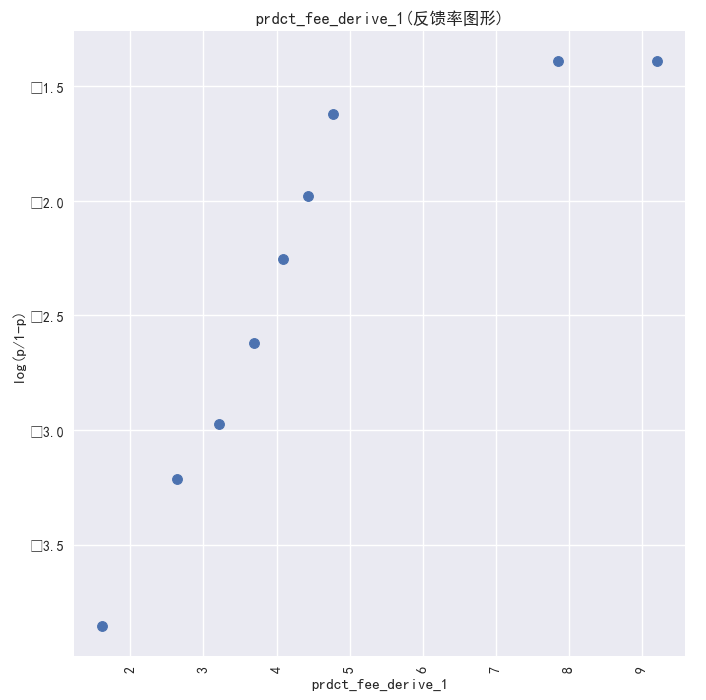

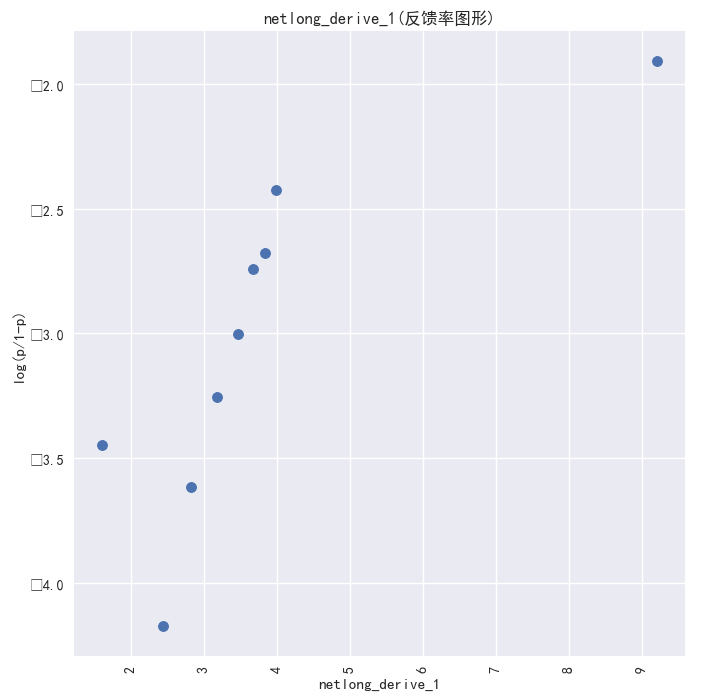

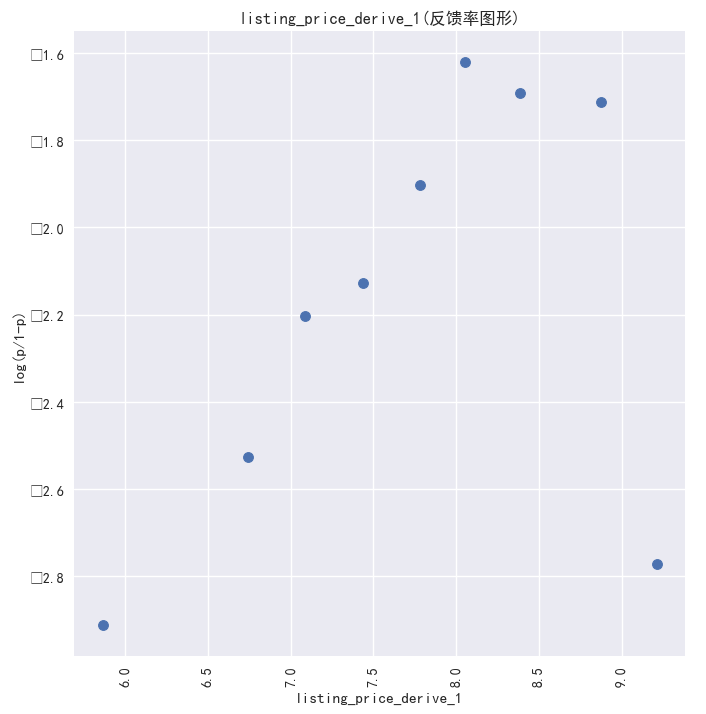

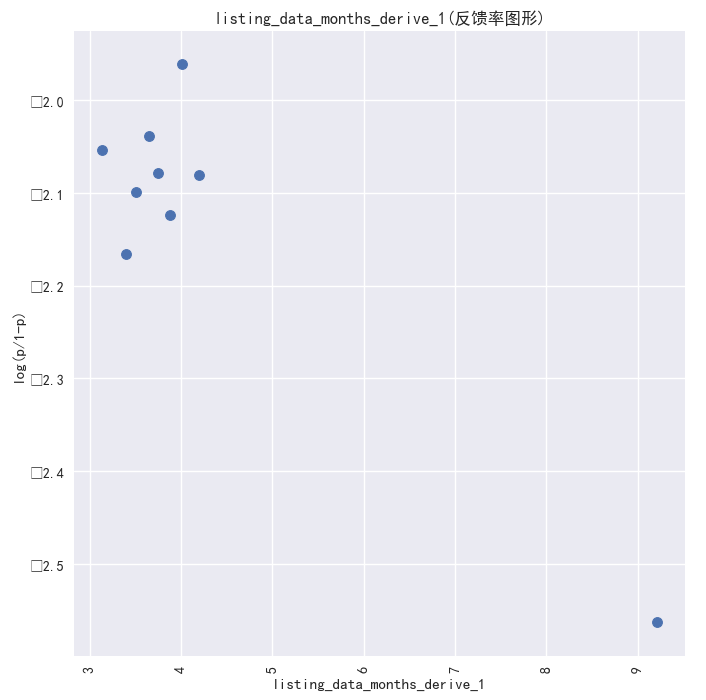

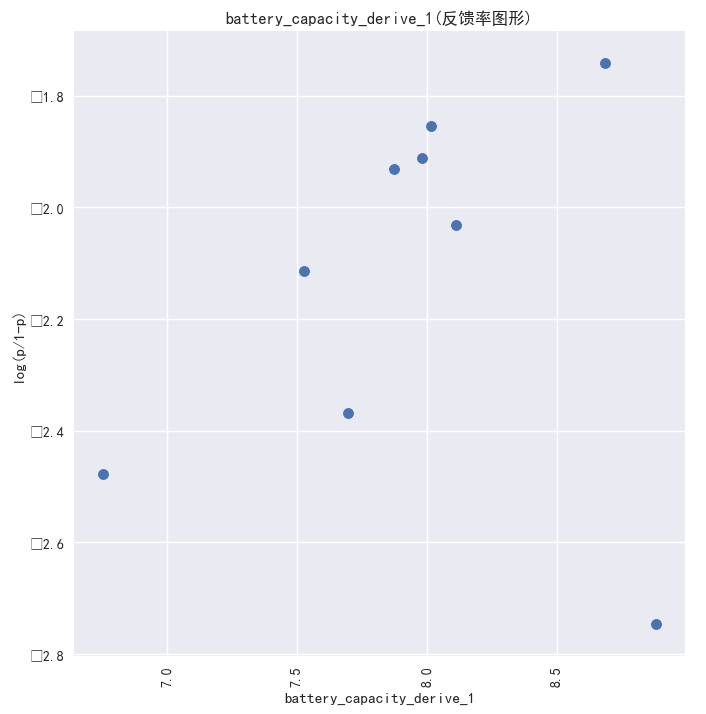

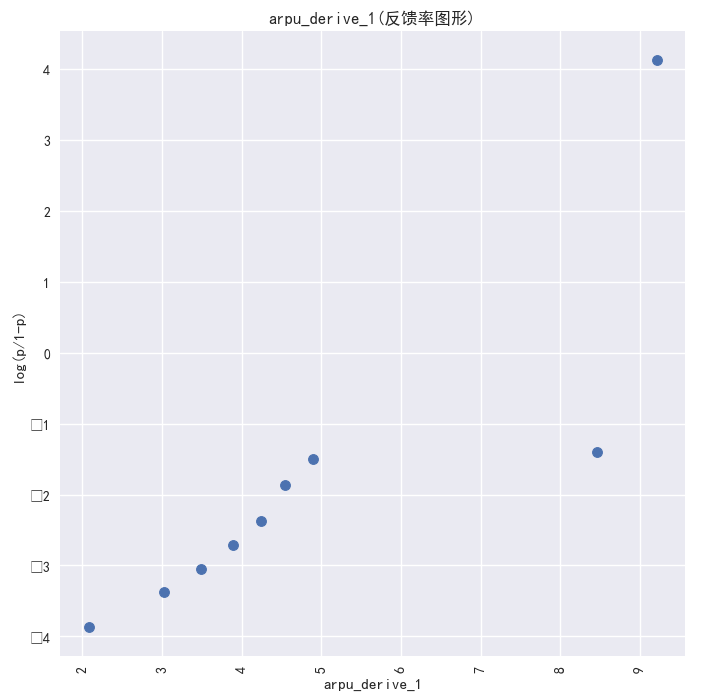

In [41]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=10)
sns.set(font=myfont.get_name())

# 对连续型变量的反馈率数据进行绘图操作：
ContinuousColumnList=['prdct_fee_derive_1', 'netlong_derive_1',
       'listing_price_derive_1', 'listing_data_months_derive_1',
       'battery_capacity_derive_1', 'arpu_derive_1',]
for ContinuousColumn in ContinuousColumnList:
    #print(columnvaluecount_dict[ContinuousColumn]['TurnSampleLogPercentRadio'])
    ContinuousSampleLogPercentRadio=pd.DataFrame(columnvaluecount_dict[ContinuousColumn]['TurnSampleLogPercentRadio'])
    #print(ContinuousSampleLogPercentRadio.sort_values(by=ContinuousColumn,ascending=False).iloc[1])
    ContinuousSampleLogPercentRadio.replace(float('inf'),ContinuousSampleLogPercentRadio.sort_values(by=ContinuousColumn,ascending=False).iloc[1],inplace=True)
    ContinuousSampleLogPercentRadio['X_value']=np.log(ContinuousSampleLogPercentRadio.index) #进行对数变换
    #ContinuousSampleLogPercentRadio['X_value']=ContinuousSampleLogPercentRadio.index
    #print(ContinuousSampleLogPercentRadio,ContinuousSampleLogPercentRadio.columns)
    g = sns.FacetGrid(ContinuousSampleLogPercentRadio,palette="Set1", size=7)
    g.map(plt.scatter,'X_value',ContinuousColumn,linewidth=.8)
    print(ContinuousColumn,ContinuousSampleLogPercentRadio)
    g.set_xticklabels(rotation=90)
    g.set_axis_labels(ContinuousColumn, "log(p/1-p)");
    #plt.xlim(1,8)
    plt.title(ContinuousColumn+u'(反馈率图形)')
    g.add_legend()
    g.savefig('广发信用卡模型连续型变量反馈率图像(高消费用户)\\'+ContinuousColumn+u'(反馈率图形).png',dpi=100)

prdct_fee={0:70} netlong={0:31,9999:58} listing_price={9999:500} battery_capacity={}  arpu={9999:500} screen_size={99:3}

In [42]:
xy_1.columns

Index(['index', 'id', 'target', 'card_type', 'netlong', 'owner_city', 'arpu',
       'out_prdct_fee', 'prdct_fee', 'point_fee', 'myth_fee', 'brand',
       'listing_date', 'listing_price', 'nettime', 'user_level', 'sex',
       'family_client', 'group_client', 'music', 'expirationtime',
       'video_member', 'other_tv', 'finance', 'bank', 'campus_client',
       'migu_tv', 'age', 'adis', 'arpu_avg', 'myth_fee_avg',
       'out_prdct_fee_avg', 'prdct_fee_avg', 'os', 'battery_capacity',
       'storage', 'screen_size'],
      dtype='object')

In [46]:
plt.style.use('bmh')
plt.rc('font',family = 'SimHei',size = 13)
cat_list = ['target', 'card_type', 'netlong', 'owner_city', 'arpu',
       'out_prdct_fee', 'prdct_fee', 'point_fee', 'myth_fee', 'brand',
       'listing_date', 'listing_price', 'nettime', 'user_level', 'sex',
       'family_client', 'group_client', 'music', 'expirationtime',
       'video_member', 'other_tv', 'finance', 'bank', 'campus_client',
       'migu_tv', 'age', 'adis', 'arpu_avg', 'myth_fee_avg',
       'out_prdct_fee_avg', 'prdct_fee_avg', 'os', 'battery_capacity',
       'storage', 'screen_size']
for n,i in enumerate(cat_list):
    xy_1_cat_num = xy_1[i].value_counts().index.shape[0]
    print('{0}.{1}特征的类型数量是：{2}'.format(n+1,i,xy_1_cat_num))

1.target特征的类型数量是：2
2.card_type特征的类型数量是：6
3.netlong特征的类型数量是：59
4.owner_city特征的类型数量是：265
5.arpu特征的类型数量是：19328
6.out_prdct_fee特征的类型数量是：4820
7.prdct_fee特征的类型数量是：3439
8.point_fee特征的类型数量是：7908
9.myth_fee特征的类型数量是：153
10.brand特征的类型数量是：679
11.listing_date特征的类型数量是：1105
12.listing_price特征的类型数量是：581
13.nettime特征的类型数量是：37348
14.user_level特征的类型数量是：8
15.sex特征的类型数量是：2
16.family_client特征的类型数量是：1
17.group_client特征的类型数量是：1
18.music特征的类型数量是：1
19.expirationtime特征的类型数量是：4161
20.video_member特征的类型数量是：1
21.other_tv特征的类型数量是：1
22.finance特征的类型数量是：1
23.bank特征的类型数量是：1
24.campus_client特征的类型数量是：1
25.migu_tv特征的类型数量是：1
26.age特征的类型数量是：46
27.adis特征的类型数量是：1
28.arpu_avg特征的类型数量是：53525
29.myth_fee_avg特征的类型数量是：408
30.out_prdct_fee_avg特征的类型数量是：17066
31.prdct_fee_avg特征的类型数量是：8294
32.os特征的类型数量是：10
33.battery_capacity特征的类型数量是：430
34.storage特征的类型数量是：135
35.screen_size特征的类型数量是：69


In [47]:
ChuanQi_basic_df.columns

Index(['target', 'prdct_fee_derive_1', 'netlong_derive_1',
       'listing_price_derive_1', 'listing_data_months_derive_1',
       'battery_capacity_derive_1', 'arpu_derive_1', 'arpu',
       'battery_capacity', 'brand', 'card_type', 'family_client', 'finance',
       'group_client', 'listing_data_months', 'listing_price', 'music',
       'netlong', 'out_prdct_fee', 'out_prdct_fee_avg', 'owner_city',
       'owner_city_level', 'prdct_fee', 'screen_size', 'sex', 'storage',
       'user_level', 'video_member'],
      dtype='object')

In [53]:
# 删除 listing_data_months_derive_1，owner_city，listing_data_months

xy_1=ChuanQi_basic_df[['target', 'arpu',
       'battery_capacity', 'brand', 'card_type', 'family_client', 'finance',
       'group_client', 'listing_price', 'music',
       'netlong', 'out_prdct_fee', 'out_prdct_fee_avg',
       'owner_city_level', 'prdct_fee', 'screen_size', 'sex', 'storage',
       'user_level', 'video_member']]

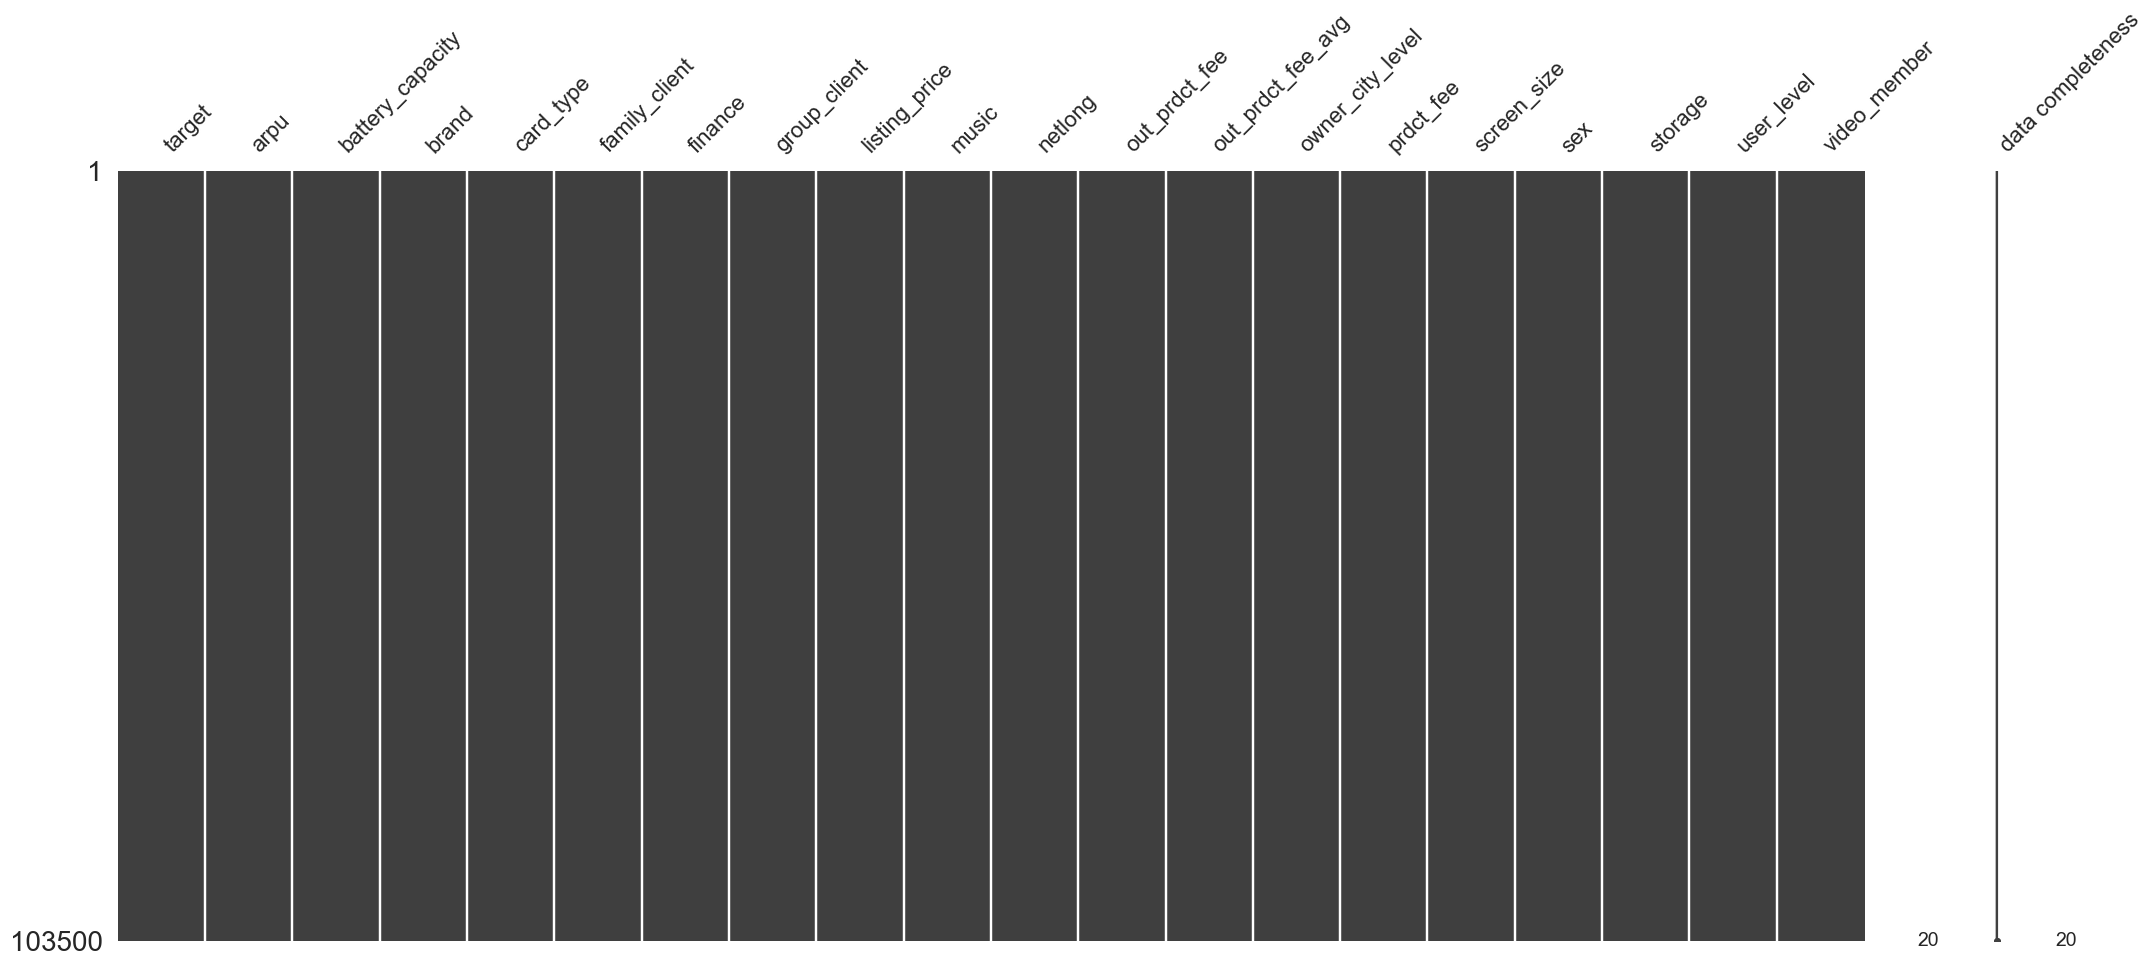

In [54]:
msno.matrix(xy_1,labels = True)

In [55]:
pandas_profiling.ProfileReport(xy_1)

Number of variables,20
Number of observations,103500
Total Missing (%),0.0%
Total size in memory,15.8 MiB
Average record size in memory,160.0 B
Numeric,10
Categorical,1
Boolean,6
Date,0
Text (Unique),0
Rejected,3


In [52]:
for columns in ['target', 'prdct_fee_derive_1', 'netlong_derive_1',
       'listing_price_derive_1',
       'battery_capacity_derive_1', 'arpu_derive_1', 'arpu',
       'battery_capacity', 'brand', 'card_type', 'family_client', 'finance',
       'group_client', 'listing_price', 'music',
       'netlong', 'out_prdct_fee', 'out_prdct_fee_avg',
       'owner_city_level', 'prdct_fee', 'screen_size', 'sex', 'storage',
       'user_level', 'video_member']:
    print(columns,len(xy_1[columns].value_counts()))

target 2
prdct_fee_derive_1 10
netlong_derive_1 10
listing_price_derive_1 9
battery_capacity_derive_1 9
arpu_derive_1 10
arpu 19261
battery_capacity 272
brand 12
card_type 7
family_client 2
finance 2
group_client 2
listing_price 569
music 2
netlong 60
out_prdct_fee 3
out_prdct_fee_avg 3
owner_city_level 11
prdct_fee 3422
screen_size 70
sex 3
storage 16
user_level 9
video_member 2


In [65]:
#去除掉以上列
xy_6 = xy_1[['target','arpu','brand','family_client','finance','group_client','listing_price','music','netlong','out_prdct_fee_avg','owner_city_level','prdct_fee','screen_size','sex','storage','user_level','video_member']]

# 连续型特征变量：['netlong','arpu','prdct_fee','listing_price','arpu_avg','prdct_fee_avg','screen_size']
# 去除重复行：
xy_6.drop_duplicates(keep='first',inplace=True)
xy_6.reset_index(inplace=True)

In [66]:

xy_6['netlong'][(xy_6['netlong']==9999)]=58
xy_6['netlong'][(xy_6['netlong']==0)]=31

xy_6['arpu'][(xy_6['arpu']>400)&(xy_6['arpu']<9999)]=400
xy_6['arpu'][(xy_6['arpu']==9999)]=500

xy_6['prdct_fee'][(xy_6['prdct_fee']==0)]=70
xy_6['prdct_fee'][(xy_6['prdct_fee']>500)&(xy_6['prdct_fee']<9999)]=500
xy_6['prdct_fee'][(xy_6['prdct_fee']==9999)]=500

xy_6['listing_price'][(xy_6['listing_price']==9999)]=500

# xy_6['arpu_avg'][(xy_6['arpu_avg']>500)&(xy_6['arpu_avg']<9999)]=500
# xy_6['arpu_avg'][(xy_6['arpu_avg']==9999)]=400

# xy_6['prdct_fee_avg'][(xy_6['prdct_fee_avg']>500)&(xy_6['prdct_fee_avg']<9999)]=500
# xy_6['prdct_fee_avg'][(xy_6['prdct_fee_avg']==9999)]=400

xy_6['screen_size'][(xy_6['screen_size']==99)]=0.37
xy_6['screen_size'][~(xy_6['screen_size'].isin([6,5.9,5.7,4.7,5.5,5.2,4.5,4,5,99,2.4,]))]=2

# # 电池容量：battery_capacity_derive_1
# batterymap={3025:1,5845:1,2875:1,2550:2,3260:2,1850:2,2175:3,7137.5:3,850.4995:3}
# xy_6['battery_capacity_derive_1'].replace(batterymap,inplace=True)

# 手机品牌：
brandmap={1:1,2:2,5:2,6:2,7:3,8:3,4:3,9:3,3:4,10:4,11:4,12:4}
xy_6['brand'].replace(brandmap,inplace=True)
# xy_6['brand'][(xy_6['brand']==8)|(xy_6['brand']==10)|(xy_6['brand']==6)] = 1000
# xy_6['brand'][(xy_6['brand']==11)|(xy_6['brand']==7)|(xy_6['brand']==12)|(xy_6['brand']==4)] = 2000
# xy_6['brand'][(xy_6['brand']==9)|(xy_6['brand']==3)|(xy_6['brand']==1)|(xy_6['brand']==2)|(xy_6['brand']==5)] = 3000

# user_level
userlevelmap={4:1,5:1,6:1,7:1,3:2,9999:3,0:4,1:4,2:4}
xy_6['user_level'].replace(userlevelmap,inplace=True)
# xy_6['user_level'][(xy_6['user_level']>=5) & (xy_6['user_level']<=7)] =100
# xy_6['user_level'][(xy_6['user_level']<=4) | (xy_6['user_level']==9999)] = 200

# 内存表：

storagemap={'64GB':1,'128GB':1,'32GB':1,'16GB':1,'4GB':2,'8GB':2,'512MB':2,'nan':2,'256MB':3,'128MB':3,'4MB':3,'其它存储':3,'32MB':3,'64MB':3,'16MB':3,'8MB':3}
xy_6['storage'].replace(storagemap,inplace=True)

# owner_city_level
citylevelmap={8:1,9:1,9999:1,7:2,6:2,10:2,1:3,5:3,4:3,3:4,2:4}
xy_6['owner_city_level'].replace(citylevelmap,inplace=True)
# xy_6['owner_city_level'][xy_6['owner_city_level']>=7] =3
# xy_6['owner_city_level'][(xy_6['owner_city_level']>=4) & (xy_6['owner_city_level']<7)] = 2
# xy_6['owner_city_level'][xy_6['owner_city_level']<=3] = 1



In [67]:
xy_6.columns

Index(['index', 'target', 'arpu', 'brand', 'family_client', 'finance',
       'group_client', 'listing_price', 'music', 'netlong',
       'out_prdct_fee_avg', 'owner_city_level', 'prdct_fee', 'screen_size',
       'sex', 'storage', 'user_level', 'video_member'],
      dtype='object')

In [68]:
for columns in [ 'target', 'arpu', 'brand', 'family_client',
       'finance', 'group_client', 'listing_price', 'music', 'netlong',
       'out_prdct_fee_avg', 'owner_city_level', 'prdct_fee', 'screen_size',
       'sex', 'storage', 'user_level', 'video_member']:
    print(columns,len(xy_6[columns].value_counts()))

target 2
arpu 18557
brand 4
family_client 2
finance 2
group_client 2
listing_price 568
music 2
netlong 58
out_prdct_fee_avg 3
owner_city_level 4
prdct_fee 3380
screen_size 11
sex 3
storage 3
user_level 4
video_member 2


In [69]:
# 对模型的离散型变量进行虚拟变量处理：onehot编码需要str格式
ClassifyColumnsList=['brand', 'family_client',
       'finance', 'group_client', 'music', 'out_prdct_fee_avg',
       'owner_city_level', 'sex', 'storage', 'user_level',
       'video_member']

for ClassifyColumn in ClassifyColumnsList:
    #print(ClassifyColumn,len(ChuanQi_basic_df[ClassifyColumn].value_counts()))
    xy_6[ClassifyColumn]=xy_6[ClassifyColumn].astype('str')
xy_7 = xy_6[['target', 'arpu', 'brand', 'family_client', 'finance',
       'group_client', 'listing_price', 'music', 'netlong',
       'out_prdct_fee_avg', 'owner_city_level', 'prdct_fee', 'screen_size',
       'sex', 'storage', 'user_level', 'video_member']]
##筛选特定列
display(xy_7.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99546 entries, 0 to 99545
Data columns (total 17 columns):
target               99546 non-null int64
arpu                 99546 non-null float64
brand                99546 non-null object
family_client        99546 non-null object
finance              99546 non-null object
group_client         99546 non-null object
listing_price        99546 non-null float64
music                99546 non-null object
netlong              99546 non-null float64
out_prdct_fee_avg    99546 non-null object
owner_city_level     99546 non-null object
prdct_fee            99546 non-null float64
screen_size          99546 non-null float64
sex                  99546 non-null object
storage              99546 non-null object
user_level           99546 non-null object
video_member         99546 non-null object
dtypes: float64(5), int64(1), object(11)
memory usage: 12.9+ MB


None

In [70]:
xy_7_onehot=pd.get_dummies(xy_7)
xy_7_onehot.columns

Index(['target', 'arpu', 'listing_price', 'netlong', 'prdct_fee',
       'screen_size', 'brand_1', 'brand_2', 'brand_3', 'brand_4',
       'family_client_1.0', 'family_client_9999.0', 'finance_1.0',
       'finance_9999.0', 'group_client_1.0', 'group_client_9999.0',
       'music_1.0', 'music_9999.0', 'out_prdct_fee_avg_0.0',
       'out_prdct_fee_avg_1.0', 'out_prdct_fee_avg_9999.0',
       'owner_city_level_1.0', 'owner_city_level_2.0', 'owner_city_level_3.0',
       'owner_city_level_4.0', 'sex_0.0', 'sex_1.0', 'sex_9999.0', 'storage_1',
       'storage_2', 'storage_3', 'user_level_1.0', 'user_level_2.0',
       'user_level_3.0', 'user_level_4.0', 'video_member_1.0',
       'video_member_9999.0'],
      dtype='object')

In [71]:
np.isnan(xy_7_onehot).any()#False表示无缺失值
xy_7_onehot[xy_7_onehot.isnull().values==True]

,target,arpu,listing_price,netlong,prdct_fee,screen_size,brand_1,brand_2,brand_3,brand_4,...,sex_9999.0,storage_1,storage_2,storage_3,user_level_1.0,user_level_2.0,user_level_3.0,user_level_4.0,video_member_1.0,video_member_9999.0


In [72]:
from sklearn import linear_model as lr
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as ms
import sklearn.metrics as sm
class_weight = dict({1:9,0:1})#配置权重，1万正样本权重为9,9万随机样本的权重为1
df_x = xy_7_onehot[[ 'arpu', 'listing_price', 'netlong', 'prdct_fee',
       'screen_size', 'brand_1', 'brand_2', 'brand_3', 'brand_4',
       'family_client_1.0', 'family_client_9999.0', 'finance_1.0',
       'finance_9999.0', 'group_client_1.0', 'group_client_9999.0',
       'music_1.0', 'music_9999.0', 'out_prdct_fee_avg_0.0',
       'out_prdct_fee_avg_1.0', 'out_prdct_fee_avg_9999.0',
       'owner_city_level_1.0', 'owner_city_level_2.0', 'owner_city_level_3.0',
       'owner_city_level_4.0', 'sex_0.0', 'sex_1.0', 'sex_9999.0', 'storage_1',
       'storage_2', 'storage_3', 'user_level_1.0', 'user_level_2.0',
       'user_level_3.0', 'user_level_4.0', 'video_member_1.0',
       'video_member_9999.0']]
df_y = xy_7_onehot['target']
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size=0.5, random_state=0)

#逻辑回归
model = linear_model.LogisticRegression(class_weight = class_weight)
# model = linear_model.Lasso()
model.fit(X_train, Y_train)
y_train_score = model.decision_function(X_train)#用于计算训练集的KS值
y_score = model.decision_function(X_test)#计算预测结果概率值，用于计算测试集的KS值
y_test = model.predict(X_test)
print('模型预测成功率为：',(y_test == Y_test).sum() / len(y_test))
y_test1 = pd.Series(y_test)#**numpy没有value_counts,故要转化为pd.Series.此处是预测值
Y_test1 = pd.Series(Y_test)
print('真实测试数据：\n',Y_test1.value_counts())
print('预测的测试数据：\n', y_test1.value_counts())

模型预测成功率为： 0.7151065838908646
真实测试数据：
 0    44908
1     4865
Name: target, dtype: int64
预测的测试数据：
 0    33482
1    16291
dtype: int64


In [73]:
import sklearn
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

#对数据的训练集进行标准化
ss = StandardScaler()
X_StandardScaler = ss.fit(X_train)
X_train=X_StandardScaler.transform(X_train)
X_test= X_StandardScaler.transform(X_test)
# X_train = ss.fit_transform(X_train)     #先拟合数据在进行标准化
# X_test = ss.fit_transform(X_test)
display(len(X_train),len(X_test))


lr = LogisticRegressionCV(multi_class="ovr",fit_intercept=True,Cs=np.logspace(-2,2,20),cv=2,penalty="l2",solver="lbfgs",tol=0.01)

re = lr.fit(X_train,Y_train)
r_train = re.score(X_train,Y_train)


print("R值(准确率):",r_train)
print("参数:",re.coef_)
print("截距:",re.intercept_)
print("稀疏化特征比率:%.2f%%" %(np.mean(lr.coef_.ravel()==0)*100))
print("=========sigmoid函数转化的值，即：概率p=========")
print(re.predict_proba(X_test)[:5])     #sigmoid函数转化的值，即：概率p


Y_test_predict = lr.predict(X_test)      #预测

# 计算测试集的准确率···
r_test = re.score(X_test,Y_test)
print("R值(准确率):",r_test)
display(Y_test_predict.sum())

49773

49773

R值(准确率): 0.9033813513350611
参数: [[ 0.28371333  0.13853035  0.52127705  0.24559336  0.03512787 -0.05274045
   0.06400715  0.04431161 -0.05065567 -0.10493281  0.10493281  0.08470831
  -0.08470831  0.07469523 -0.07469523  0.07994404 -0.07994404 -0.19817385
  -0.04977962  0.15110344  0.24767655  0.19399538 -0.0191327  -0.29800022
   0.0370286  -0.00712753 -0.02228389  0.04233151  0.00255958 -0.13059756
   0.12214793  0.00506527 -0.01486413 -0.07335882 -0.01458375  0.01458375]]
截距: [-2.72741622]
稀疏化特征比率:0.00%
=========sigmoid函数转化的值，即：概率p=========
[[0.85525171 0.14474829]
 [0.81026161 0.18973839]
 [0.65902785 0.34097215]
 [0.96230389 0.03769611]
 [0.95788173 0.04211827]]
R值(准确率): 0.9020754224177767


523

In [74]:
# 绘制模型的Roc/Auc值的曲线图

from sklearn import metrics

lr_y_test_score = lr.decision_function(X_test)
lr_fpr_test,lr_tpr_test,lr_threasholds_test = metrics.roc_curve(Y_test.ravel(),lr_y_test_score.ravel())
lr_auc_test = metrics.auc(lr_fpr_test,lr_tpr_test)

lr_y_train_score = lr.decision_function(X_train)
lr_fpr_train,lr_tpr_train,lr_threasholds_train = metrics.roc_curve(Y_train.ravel(),lr_y_train_score.ravel())  #Y_predict
lr_auc_train = metrics.auc(lr_fpr_train,lr_tpr_train)


print("Logistic算法R值(训练):",lr.score(X_train,Y_train))
print("Logistic算法AUC值(训练):",lr_auc_train)

print("Logistic算法R值(测试):",lr.score(X_test,Y_test))
print("Logistic算法AUC值(测试):",lr_auc_test)

Logistic算法R值(训练): 0.9033813513350611
Logistic算法AUC值(训练): 0.7862504835414292
Logistic算法R值(测试): 0.9020754224177767
Logistic算法AUC值(测试): 0.7832230488624409


In [75]:
# 在训练集上统计十等分检验表：
Y_train_proba=lr.predict_proba(X_train)
Y_train_predict=lr.predict(X_train)
Y_train_predict_true=Y_train_proba[:,1]

Y_test_proba=lr.predict_proba(X_test)
Y_test_predict=lr.predict(X_test)
Y_test_predict_true=Y_test_proba[:,1]
Y_train_predict.sum()

476

In [76]:
# 训练集的十等分表：
IndexSeriers=pd.Series(np.arange(0,10,1))


Result_KS_10_Dic={'Train_KS_10':{},'Test_KS_10':{}}
Result_KS_10_Dic['Train_KS_10']['y_train']=Y_train
Result_KS_10_Dic['Train_KS_10']['y_train_predict']=Y_train_predict
Result_KS_10_Dic['Train_KS_10']['y_train_true_proba']=Y_train_predict_true
Train_KS_10_df=pd.DataFrame(Result_KS_10_Dic['Train_KS_10'])

Result_KS_10_Dic['Test_KS_10']['y_test']=Y_test
Result_KS_10_Dic['Test_KS_10']['y_test_predict']=Y_test_predict
Result_KS_10_Dic['Test_KS_10']['y_test_true_proba']=Y_test_predict_true
Test_KS_10_df=pd.DataFrame(Result_KS_10_Dic['Test_KS_10'])
display(Train_KS_10_df.head(),len(Train_KS_10_df),Test_KS_10_df.head(),len(Test_KS_10_df))
# 对概率值进行降序排列：
Train_KS_10_df.sort_values('y_train_true_proba',ascending=False,inplace=True)
Train_KS_10_df.reset_index(inplace=True)
Train_KS_10_df['true_proba_cluster']=pd.qcut(Train_KS_10_df.y_train_true_proba,10)
Result_KS_10_Dic['KS_10_cluster_crowd_number']=pd.DataFrame(Train_KS_10_df.true_proba_cluster.value_counts().sort_index(ascending=False))
Result_KS_10_Dic['KS_10_cluster_crowd_number'].reset_index(inplace=True)
Result_KS_10_Dic['KS_10_cluster_crowd_number']=pd.concat([Result_KS_10_Dic['KS_10_cluster_crowd_number'],IndexSeriers],axis=1)
display(Result_KS_10_Dic['KS_10_cluster_crowd_number'])

# 对测试值进行降序排列：
Test_KS_10_df.sort_values('y_test_true_proba',ascending=False,inplace=True)
Test_KS_10_df.reset_index(inplace=True)
Test_KS_10_df['true_proba_cluster']=pd.qcut(Test_KS_10_df.y_test_true_proba,10)
Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']=pd.DataFrame(Test_KS_10_df.true_proba_cluster.value_counts().sort_index(ascending=False))
Result_KS_10_Dic['Test_KS_10_cluster_crowd_number'].reset_index(inplace=True)
Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']=pd.concat([Result_KS_10_Dic['Test_KS_10_cluster_crowd_number'],IndexSeriers],axis=1)
display(Result_KS_10_Dic['Test_KS_10_cluster_crowd_number'])


,y_train,y_train_predict,y_train_true_proba
73603,0,0,0.036865
49804,0,0,0.294818
48234,0,0,0.344871
34689,0,0,0.097359
30540,0,0,0.019259


49773

,y_test,y_test_predict,y_test_true_proba
56548,0,0,0.144748
97572,0,0,0.189738
12558,0,0,0.340972
12658,0,0,0.037696
58488,0,0,0.042118


49773

,index,true_proba_cluster,0
0,"(0.221, 0.918]",4978,0
1,"(0.149, 0.221]",4977,1
2,"(0.111, 0.149]",4977,2
3,"(0.0836, 0.111]",4977,3
4,"(0.063, 0.0836]",4977,4
5,"(0.0473, 0.063]",4978,5
6,"(0.0344, 0.0473]",4977,6
7,"(0.0236, 0.0344]",4977,7
8,"(0.0137, 0.0236]",4977,8
9,"(-0.00040300000000000004, 0.0137]",4978,9


,index,true_proba_cluster,0
0,"(0.225, 0.924]",4978,0
1,"(0.15, 0.225]",4977,1
2,"(0.111, 0.15]",4977,2
3,"(0.084, 0.111]",4977,3
4,"(0.0633, 0.084]",4977,4
5,"(0.0472, 0.0633]",4978,5
6,"(0.0344, 0.0472]",4977,6
7,"(0.0235, 0.0344]",4977,7
8,"(0.0137, 0.0235]",4977,8
9,"(-0.000236, 0.0137]",4978,9


In [77]:
# 计算KS_10对应的分层映射值：
Result_KS_10_Dic['KS_10_cluster_map']={}
for index_number in range(len(Result_KS_10_Dic['KS_10_cluster_crowd_number'])):
    Result_KS_10_Dic['KS_10_cluster_map'][Result_KS_10_Dic['KS_10_cluster_crowd_number']['index'][index_number]]=index_number
display(Result_KS_10_Dic['KS_10_cluster_map'])

# 计算KS_10对应的分层映射值：
Result_KS_10_Dic['Test_KS_10_cluster_map']={}
for index_number in range(len(Result_KS_10_Dic['Test_KS_10_cluster_crowd_number'])):
    Result_KS_10_Dic['Test_KS_10_cluster_map'][Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']['index'][index_number]]=index_number
display(Result_KS_10_Dic['Test_KS_10_cluster_map'])

{Interval(0.221, 0.918, closed='right'): 0,
 Interval(0.149, 0.221, closed='right'): 1,
 Interval(0.111, 0.149, closed='right'): 2,
 Interval(0.0836, 0.111, closed='right'): 3,
 Interval(0.063, 0.0836, closed='right'): 4,
 Interval(0.0473, 0.063, closed='right'): 5,
 Interval(0.0344, 0.0473, closed='right'): 6,
 Interval(0.0236, 0.0344, closed='right'): 7,
 Interval(0.0137, 0.0236, closed='right'): 8,
 Interval(-0.00040300000000000004, 0.0137, closed='right'): 9}

{Interval(0.225, 0.924, closed='right'): 0,
 Interval(0.15, 0.225, closed='right'): 1,
 Interval(0.111, 0.15, closed='right'): 2,
 Interval(0.084, 0.111, closed='right'): 3,
 Interval(0.0633, 0.084, closed='right'): 4,
 Interval(0.0472, 0.0633, closed='right'): 5,
 Interval(0.0344, 0.0472, closed='right'): 6,
 Interval(0.0235, 0.0344, closed='right'): 7,
 Interval(0.0137, 0.0235, closed='right'): 8,
 Interval(-0.000236, 0.0137, closed='right'): 9}

In [78]:
Train_KS_10_df['true_proba_cluster_map']=Train_KS_10_df['true_proba_cluster'].replace(Result_KS_10_Dic['KS_10_cluster_map'])

Test_KS_10_df['true_proba_cluster_map']=Test_KS_10_df['true_proba_cluster'].replace(Result_KS_10_Dic['Test_KS_10_cluster_map'])

Train_KS_10_df_groupby_true_proba_cluster_map=Train_KS_10_df.groupby('true_proba_cluster_map')

Test_KS_10_df_groupby_true_proba_cluster_map=Test_KS_10_df.groupby('true_proba_cluster_map')

Result_KS_10_Dic['KS_10_TPV_Number']={}
for proba_cluster_map,proba_cluster_value_df in Train_KS_10_df_groupby_true_proba_cluster_map:
    Result_KS_10_Dic['KS_10_TPV_Number'][proba_cluster_map]=(Train_KS_10_df_groupby_true_proba_cluster_map.get_group(proba_cluster_map)['y_train']==1).sum()
    
Result_KS_10_Dic['Test_KS_10_TPV_Number']={}
for proba_cluster_map,proba_cluster_value_df in Test_KS_10_df_groupby_true_proba_cluster_map:
    Result_KS_10_Dic['Test_KS_10_TPV_Number'][proba_cluster_map]=(Test_KS_10_df_groupby_true_proba_cluster_map.get_group(proba_cluster_map)['y_test']==1).sum()


Result_KS_10_Dic['Real_True_Sample_number']=pd.Series(Result_KS_10_Dic['KS_10_TPV_Number'])
Result_KS_10_Dic['Real_True_Sample_number_rate3']=Result_KS_10_Dic['Real_True_Sample_number']/Result_KS_10_Dic['KS_10_cluster_crowd_number']['true_proba_cluster']
Result_KS_10_Dic['Real_True_Sample_number_rate4']=pd.Series(Result_KS_10_Dic['Real_True_Sample_number']/np.array(list(Result_KS_10_Dic['KS_10_TPV_Number'].values())).sum())

#Result_KS_10_Dic['Test_KS_10_TPV_Number']
Result_KS_10_Dic['Test_Real_True_Sample_number']=pd.Series(Result_KS_10_Dic['Test_KS_10_TPV_Number'])
Result_KS_10_Dic['Test_Real_True_Sample_number_rate3']=Result_KS_10_Dic['Test_Real_True_Sample_number']/Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']['true_proba_cluster']
Result_KS_10_Dic['Test_Real_True_Sample_number_rate4']=pd.Series(Result_KS_10_Dic['Test_Real_True_Sample_number']/np.array(list(Result_KS_10_Dic['Test_KS_10_TPV_Number'].values())).sum())


Result_KS_10_Statistics_df=pd.concat([Result_KS_10_Dic['KS_10_cluster_crowd_number']['true_proba_cluster'],Result_KS_10_Dic['Real_True_Sample_number'],Result_KS_10_Dic['Real_True_Sample_number_rate3'],Result_KS_10_Dic['Real_True_Sample_number_rate4']],axis=1)
Result_KS_10_Statistics_df.columns=['CustomNumber','True_Sample_CustomNumber','Real_True_Sample_number_rate3','Real_True_Sample_number_rate4']
Result_KS_10_Statistics_df['Real_True_Sample_number_rate4_accumulate']=Result_KS_10_Statistics_df['Real_True_Sample_number_rate4'].cumsum()
Result_KS_10_Statistics_df['Real_True_Sample_number_rate_random']=np.linspace(0,Result_KS_10_Statistics_df['Real_True_Sample_number_rate4_accumulate'].max(),10)
Result_KS_10_Statistics_df['ModelAcquireVaue']=Result_KS_10_Statistics_df['Real_True_Sample_number_rate4_accumulate']-Result_KS_10_Statistics_df['Real_True_Sample_number_rate_random']


Result_KS_10_Statistics_Test_df=pd.concat([Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']['true_proba_cluster'],Result_KS_10_Dic['Test_Real_True_Sample_number'],Result_KS_10_Dic['Test_Real_True_Sample_number_rate3'],Result_KS_10_Dic['Test_Real_True_Sample_number_rate4']],axis=1)
Result_KS_10_Statistics_Test_df.columns=['Test_CustomNumber','Test_True_Sample_CustomNumber','Test_Real_True_Sample_number_rate3','Test_Real_True_Sample_number_rate4']
Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4_accumulate']=Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4'].cumsum()
Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate_random']=np.linspace(0,Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4_accumulate'].max(),10)
Result_KS_10_Statistics_Test_df['Test_ModelAcquireVaue']=Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4_accumulate']-Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate_random']



In [79]:
Result_KS_10_Dic['KS_Point']={'x_point':Result_KS_10_Statistics_df['ModelAcquireVaue'].idxmax(),'y_point':Result_KS_10_Statistics_df['Real_True_Sample_number_rate4_accumulate'][Result_KS_10_Statistics_df['ModelAcquireVaue'].idxmax()]}
display(Result_KS_10_Dic['KS_Point'])

Result_KS_10_Dic['Test_KS_Point']={'x_point':Result_KS_10_Statistics_Test_df['Test_ModelAcquireVaue'].idxmax(),'y_point':Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4_accumulate'][Result_KS_10_Statistics_Test_df['Test_ModelAcquireVaue'].idxmax()]}
display(Result_KS_10_Dic['Test_KS_Point'])

{'x_point': 2, 'y_point': 0.6865795478116573}

{'x_point': 2, 'y_point': 0.6832476875642344}

In [80]:
#每个箱子中箱子正样本比例Real_True_Sample_number_rate3=True_Sample_CustomNumber/ CustomNumber
#箱子正样本占总正样本比例Real_True_Sample_number_rate4=True_Sample_CustomNumber/ΣTrue_Sample_CustomNumber
#累计和Real_True_Sample_number_rate4_accumulate=ΣReal_True_Sample_number_rate4
display(Result_KS_10_Statistics_df,Result_KS_10_Statistics_Test_df)

,CustomNumber,True_Sample_CustomNumber,Real_True_Sample_number_rate3,Real_True_Sample_number_rate4,Real_True_Sample_number_rate4_accumulate,Real_True_Sample_number_rate_random,ModelAcquireVaue
0,4978,1706,0.342708,0.353868,0.353868,0.000000,0.353868
1,4977,959,0.192686,0.198921,0.552790,0.111111,0.441679
2,4977,645,0.129596,0.133790,0.686580,0.222222,0.464357
3,4977,469,0.094233,0.097283,0.783862,0.333333,0.450529
4,4977,337,0.067711,0.069903,0.853765,0.444444,0.409320
5,4978,243,0.048815,0.050404,0.904169,0.555556,0.348614
6,4977,205,0.041189,0.042522,0.946692,0.666667,0.280025
7,4977,126,0.025316,0.026136,0.972827,0.777778,0.195049
8,4977,83,0.016677,0.017216,0.990044,0.888889,0.101155
9,4978,48,0.009642,0.009956,1.000000,1.000000,0.000000


,Test_CustomNumber,Test_True_Sample_CustomNumber,Test_Real_True_Sample_number_rate3,Test_Real_True_Sample_number_rate4,Test_Real_True_Sample_number_rate4_accumulate,Test_Real_True_Sample_number_rate_random,Test_ModelAcquireVaue
0,4978,1691,0.339695,0.347585,0.347585,0.000000,0.347585
1,4977,982,0.197308,0.201850,0.549435,0.111111,0.438324
2,4977,651,0.130802,0.133813,0.683248,0.222222,0.461025
3,4977,460,0.092425,0.094553,0.777801,0.333333,0.444467
4,4977,357,0.071730,0.073381,0.851182,0.444444,0.406737
5,4978,250,0.050221,0.051387,0.902569,0.555556,0.347014
6,4977,193,0.038778,0.039671,0.942240,0.666667,0.275574
7,4977,140,0.028129,0.028777,0.971017,0.777778,0.193240
8,4977,88,0.017681,0.018088,0.989106,0.888889,0.100217
9,4978,53,0.010647,0.010894,1.000000,1.000000,0.000000


Optimization terminated successfully.
         Current function value: 0.310768
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.316964
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.312762
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.316946
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.315150
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.306186
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.317386
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.316975
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.315804
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.311247
  

Optimization terminated successfully.
         Current function value: 0.287303
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.289514
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.287634
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.286362
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.288839
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.289472
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.289103
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.288872
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.283244
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.289472
  

Optimization terminated successfully.
         Current function value: 0.278008
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280365
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280417
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280417
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280308
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.278899
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.279106
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.279022
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.280135
         Iterations 8
Add  brand_4                        with p-value 7.39038e-53
Optimization terminat

Optimization terminated successfully.
         Current function value: 0.275224
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275047
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275135
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274773
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274780
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.274841
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275198
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.275297
  

Optimization terminated successfully.
         Current function value: 0.272475
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272358
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272475
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272410
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272472
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272475
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272114
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272433
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272437
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.272246
  

Optimization terminated successfully.
         Current function value: 0.270445
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.270504
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.270504
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.270140
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.270418
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.270504
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.270286
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.270338
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.270146
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.270504
  

Optimization terminated successfully.
         Current function value: 0.269618
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.269618
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.269552
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.269618
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.269519
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.269585
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.269538
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.269590
         Iterations 8
Add  sex_0.0                        with p-value 0.000505326
Optimization terminated successfully.
         Current function value: 0.269499
         Iterations 8
Optimization terminat

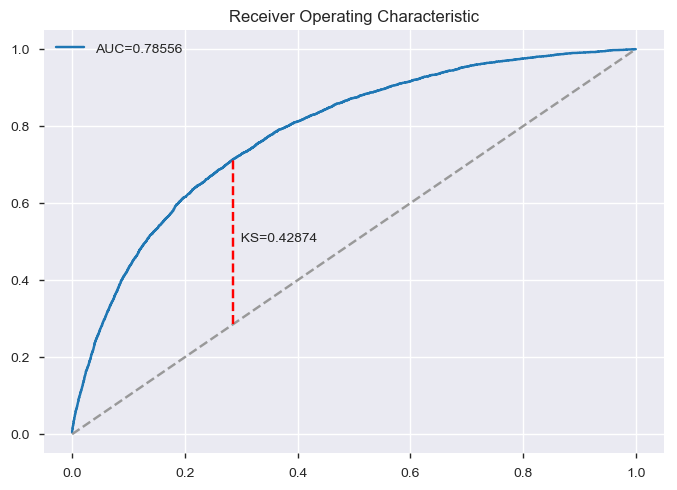

In [81]:
#显著性分析代码：p>|z|大于0.01的进入模型
#AUC（模型稳定性）和KS（区分能力）值计算
# Coef. :参数、系数
# Std. Err.：系数Coef.的方差的平方根standard error
# [95% Conf. Interval] 系数Coef.的95%置信区间
# P>|z|: 值小于或等于0.05表示结果显著。 
#两个变量协方差分析相关性强，保留Z值绝对值大（显著性强）的那个，如brand和list_price相关性强，就把Z值大的brand2留下
import os
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import auc,roc_curve
import matplotlib.pyplot as plt
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size=0.5, random_state=0)
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose = True):
    included = list(initial_list)
 
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
 
        # backward step
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
 
result = stepwise_selection(X_train, Y_train)#模板改这里的参数X_train, Y_train
 
print('resulting features:')
print(result)

lr = sm.Logit(Y_train,sm.add_constant(X_train[result]))
rst = lr.fit()
print(rst.summary2())

y_predicted = rst.predict(sm.add_constant(X_train[result]))

fpr, tpr, thresholds = roc_curve(Y_train,y_predicted, pos_label=1)
auc_score = auc(fpr,tpr)
w = tpr - fpr
ks_score = w.max()
ks_x = fpr[w.argmax()]
ks_y = tpr[w.argmax()]
fig,ax = plt.subplots()
ax.plot(fpr,tpr,label='AUC=%.5f'%auc_score)
ax.set_title('Receiver Operating Characteristic')
ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
ax.plot([ks_x,ks_x], [ks_x,ks_y], '--', color='red')
ax.text(ks_x,(ks_x+ks_y)/2,'  KS=%.5f'%ks_score)
ax.legend()
fig.show()  